### <font color= 'white'> S&P 500 PostCovid *Optimizations & ML models*<font> 

##### [![S&P500-PostCovid_ML](https://img.shields.io/badge/Repository-S&P500--PostCovid--ML-020521?style=flat-square&logo=github&logoColor=white)](https://mango-dune-07a8b7110.1.azurestaticapps.net/?repo=EstebanMqz%2FSP500-Risk-Optimized-Portfolios-PostCovid-ML)

##### <font color= 'lightblue'> *Introduction*: <font>

<font color= 'white'> 
Time series modelling is a powerful forecast tool and the stock market tends to be an interesting example because statistical estimators are of special interest.<br> 
They can be used to predict variables, their interaction with other variables and for general efficient decision-making purposes with less human intervention.<br>
The industries where it can be applied are numerous, but the most common are the following:<br>

- Government
- Banking
- Insurance
- Energy
- Healthcare
- Telecommunications
- Retail
- Education

##### <font color= 'lightblue'> *Objective*: <font>

<font color= 'white'>

In this project, from Covid until the present date, Descriptive Statistics techniques will be made in detail in addition to theoretical and experimental demonstrations<br>
of why Log $r_t$ is used instead of Simple $R_t$ from $x_i\in [x_1,x_{500}] \hookrightarrow S\&P500$. Afterwards. $X_i$ Selections will be made accordingly. As result, <br>
Descritive Statistics will be used to model $x_i\in [x_1,x_{25}] \hookrightarrow R_{Sortino_{+25}}$ and its resamplings in order to perform daily based ${max|min}_{\vec{w_i}} R_{j_+}$ optimizations.<br>
Afterwards, portfolios ${max|min}_{\vec{w_i}} R_{j_+}$ will be compared in terms of $max_{\vec{w_i}}$&nbsp;$R_{Sortino_{+_{25}}}\hookrightarrow S\&P500$ from which simulations $f(x_{r_{t}})\sim X_{r_{t}}$ are used to make a daily based ML forecast. 

It is divided in the folllowing sections:

0. *Virtual Environment*<br>

1. *Data Extraction and Exploration*: $x_i\in [x_1,x_{500}] \hookrightarrow S\&P500$.<br>

2. *Descriptive Statistics $\&$ Analytics*: $x_i\in [x_1,x_{25}]$ $\hookrightarrow$ $R_{Sortino_{+_{25}}}$.

3. *Optimizations*: ${max|min}_{\vec{w_i}} R_{j_+} \models max_{\vec{w_i}}$&nbsp;$R_{Sortino_{+_{25}}}$.

4. *Simulations*: $f(x_{r_{t}})\sim X_{r_{t}}$ from $max_{\vec{w_i}}$&nbsp;$R_{Sortino_{+_{25}}}$.

5. *Forecast*: $X_{r_{t}}$ Accumulated Returns.<br><br>

### <font color= 'lightblue'> 0. *Virtual Environment*: <font>

##### <font color= 'lightblue'> 0.1 <u> Load Dependencies: </u><font>

In [1]:
import functions as fn
import data as dt
import visualizations as vs 

##### <font color= 'lightblue'> 0.2 <u> Install Libs. & Modules: </u><font>

<span style='color:red'> Project Creators: <span>

Create `requirements.txt` file:

<span style='color:gray'> *Skip to installation if you are not interested in contributing to the project.* <font>

In [2]:
docstring = """
# -- -------------------------------------------------------------------------------------- -- # 
# -- project: S&P500-Risk-Optimized-Portfolios-PostCovid-ML                                 -- # 
# -- script: requirements.txt: txt file to download Python modules for execution            -- # 
# -- author: EstebanMqz                                                                     -- # 
# -- license: CC BY 3.0                                                                     -- # 
# -- repository: SP500-Risk-Optimized-Portfolios-PostCovid-ML/blob/main/requirements.txt    -- #                                  
# -- -------------------------------------------------------------------------------------- -- # 
\n
"""

path = fn.get_requirements(docstring)

requirements.txt file created in local path: c:\Users\Esteban\Desktop\Projects\Github\Repos_To-do\Languages\Python\Fin_Sim\Projects\SP500-Risk-Optimized-Portfolios-ML\requirements.txt


<span style='color:green'> Project Users: <span>

Install packages in [*`requirements.txt`*](https://github.com/EstebanMqz/SP500-Risk-Optimized-Portfolios-PostCovid-ML/blob/main/requirements.txt) file: <br>

In [3]:
fn.library_install("requirements.txt")

Requirements installed.

# -- -------------------------------------------------------------------------------------- -- # 
# -- project: S&P500-Risk-Optimized-Portfolios-PostCovid-ML                                 -- # 
# -- script: requirements.txt: txt file to download Python modules for execution            -- # 
# -- author: EstebanMqz                                                                     -- # 
# -- license: CC BY 3.0                                                                     -- # 
# -- repository: SP500-Risk-Optimized-Portfolios-PostCovid-ML/blob/main/requirements.txt    -- #                                  
# -- -------------------------------------------------------------------------------------- -- # 


numpy >= 1.22.4 
pandas >= 1.4.4 
matplotlib >= 3.5.3 
scipy >= 1.7.3 
sklearn >= 1.0.2 
logging >= 0.5.1.2 
jupyter >= 1.0.0 
yahoofinanicals >= 1.14 
tabulate >= 0.8.9 
IPython >= 8.12.0 
fitter >= 1.5.2 



##### <font color= 'lightblue'> 0.3 <u> Load Libraries & Modules: </u><font>

In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None
              ,"display.max_colwidth", None, "display.width", None)

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%matplotlib inline
import seaborn as sns

import scipy
import scipy.stats as st
from scipy import optimize
from scipy.optimize import minimize

import sklearn
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics

from yahoofinancials import YahooFinancials 
from tabulate import tabulate
import IPython.display as d
import IPython.core.display

import datetime 
import time

from io import StringIO
from fitter import Fitter, get_common_distributions, get_distributions 
import logging
import ast

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

### <font color= 'lightblue'> 1. *Data Extraction and Exploration*: <font>

#### <font color= 'lightblue'> 1.1 *Data Extraction*: <font>
<span style='color:white'>

In this section $x_i\in [x_1,x_{500}] \hookrightarrow S\&P500$ quotes are fetched:

<span style='color:gray'> *Fetching a lot of data from Yahoo Finance by batches is required to avoid host disruptions (other sources could be used).* <font> &nbsp;

<span style='color:teal'> <u> *[`fn.SP500_tickers`](https://github.com/EstebanMqz/SP500-Risk-Optimized-Portfolios-PostCovid-ML/blob/main/functions.py)*

In [3]:
tickers = fn.SP500_tickers(50)
tickers[0][0:5], tickers[-1][0:5], sum([len(i) for i in tickers])

(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN'], ['ZBH', 'ZION', 'ZTS'], 503)

<span style='color:lightgray'> Note: *Skip to 1.1.2 if you prefer using .csv creation date.* <font> &nbsp; 

<span style='color:white'>

$6_Y$ $x_i\in [x_1,x_{500}] \hookrightarrow S\&P500$ adj. closes are fetched *(5min)* :<br>

<span style='color:teal'> <u> *[`dt.get_historical_price_data`](https://github.com/EstebanMqz/SP500-Risk-Optimized-Portfolios-PostCovid-ML/blob/main/data.py)*

In [22]:
SP_Assets_f = pd.concat([dt.get_historical_price_data(tickers[i][j], 6) 
                         for i in range(0, len(tickers)) for j in range(0, len(tickers[i]))], axis=1)

<span style='color:white'>

Adj. closes for $S\&P500$:

In [10]:
SP_f = dt.get_historical_price_data('^GSPC', 6)
SP_f = SP_f[SP_f.index.isin(SP_Assets_f.index)]
SP_f.shape

(1509, 1)

<span style='color:white'>

Fetched data is saved in [*Data*](https://github.com/EstebanMqz/SP500-Risk-Optimized-Portfolios-PostCovid-ML/tree/main/Data) *subdirectory*:<br>
+ `Assets_SP500.csv`
+ `SP500_index.csv`

In [ ]:
SP_Assets_f.to_csv("Data/Assets_SP500.csv")   
SP_f.to_csv("Data/SP500.csv")

<span style='color:white'>

Fetched $x_i$ data:

In [5]:
SP_Assets_f.head(8)

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AMD,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,AON,APA,AAPL,AMAT,APTV,ACGL,ANET,AJG,AIZ,T,ATO,ADSK,AZO,AVB,AVY,AXON,BKR,BALL,BAC,BBWI,BAX,BDX,WRB,BRK-B,BBY,BIO,TECH,BIIB,BLK,BK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BRO,BF-B,BG,CHRW,CDNS,CZR,CPT,CPB,COF,CAH,KMX,CCL,CARR,CTLT,CAT,CBOE,CBRE,CDW,CE,CNC,CNP,CDAY,CF,CRL,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,CEG,COO,CPRT,GLW,CTVA,CSGP,COST,CTRA,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DXCM,FANG,DLR,DFS,DISH,DIS,DG,DLTR,D,DPZ,DOV,DOW,DTE,DUK,DD,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,ELV,LLY,EMR,ENPH,ETR,EOG,EPAM,EQT,EFX,EQIX,EQR,ESS,EL,ETSY,RE,EVRG,ES,EXC,EXPE,EXPD,EXR,XOM,FFIV,FDS,FICO,FAST,FRT,FDX,FITB,FSLR,FE,FIS,FISV,FLT,FMC,F,FTNT,FTV,FOXA,FOX,BEN,FCX,GRMN,IT,GEHC,GEN,GNRC,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,HAL,HIG,HAS,HCA,PEAK,HSIC,HSY,HES,HPE,HLT,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUM,HBAN,HII,IBM,IEX,IDXX,ITW,ILMN,INCY,IR,PODD,INTC,ICE,IFF,IP,IPG,INTU,ISRG,IVZ,INVH,IQV,IRM,JBHT,JKHY,J,JNJ,JCI,JPM,JNPR,K,KDP,KEY,KEYS,KMB,KIM,KMI,KLAC,KHC,KR,LHX,LH,LRCX,LW,LVS,LDOS,LEN,LNC,LIN,LYV,LKQ,LMT,L,LOW,LYB,MTB,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MTCH,MKC,MCD,MCK,MDT,MRK,META,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MRNA,MHK,MOH,TAP,MDLZ,MPWR,MNST,MCO,MS,MOS,MSI,MSCI,NDAQ,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NKE,NI,NDSN,NSC,NTRS,NOC,NCLH,NRG,NUE,NVDA,NVR,NXPI,ORLY,OXY,ODFL,OMC,ON,OKE,ORCL,OGN,OTIS,PCAR,PKG,PARA,PH,PAYX,PAYC,PYPL,PNR,PEP,PFE,PCG,PM,PSX,PNW,PXD,PNC,POOL,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PTC,PSA,PHM,QRVO,PWR,QCOM,DGX,RL,RJF,RTX,O,REG,REGN,RF,RSG,RMD,RVTY,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SPG,SWKS,SJM,SNA,SEDG,SO,LUV,SWK,SBUX,STT,STLD,STE,SYK,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TRGP,TGT,TEL,TDY,TFX,TER,TSLA,TXN,TXT,TMO,TJX,TSCO,TT,TDG,TRV,TRMB,TFC,TYL,TSN,USB,UDR,ULTA,UNP,UAL,UPS,URI,UNH,UHS,VLO,VTR,VRSN,VRSK,VZ,VRTX,VFC,VTRS,VICI,V,VMC,WAB,WBA,WMT,WBD,WM,WAT,WEC,WFC,WELL,WST,WDC,WRK,WY,WHR,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
formatted_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-23,160.652100,48.843098,39.439041,50.427128,111.656731,56.066231,36.417500,139.520004,87.831337,130.373215,9.364433,32.087555,56.029453,123.906845,47.410000,81.136688,103.592712,100.056564,138.220001,73.885490,34.142654,74.781250,48.527500,47.441002,48.077820,48.577000,8.574129,10.89,47.910801,45.286701,56.729710,70.840866,52.819012,113.502151,68.960258,107.732368,80.957161,58.176659,128.760391,34.572918,72.898514,124.660004,121.511925,44.316547,36.183254,41.864582,70.712883,31.596666,35.799999,50.915081,87.955025,18.002434,71.361061,112.970001,581.400024,156.769012,74.518501,24.879999,33.864952,37.921902,20.572304,32.847721,53.550644,167.956253,26.564785,165.479996,43.096497,219.360001,26.801012,248.100006,340.077332,40.072014,172.898438,1827.939941,37.044762,97.692513,26.670000,45.208687,191.506973,66.912888,20.139940,38.609516,68.107407,59.271297,34.020000,20.549999,68.637589,48.081791,72.151154,59.180328,64.489998,55.916641,NaN,34.680000,89.465942,84.119370,34.150002,54.011288,76.598526,36.994999,22.811323,NaN,24.660902,90.620003,35.996490,318.790009,82.175034,475.000000,124.654671,46.499096,154.349991,59.064529,114.487907,26.402664,51.101757,27.906082,112.240295,96.019119,39.306553,36.673195,61.077530,64.011902,34.896297,55.510391,31.996225,38.718094,65.329689,166.198578,NaN,216.827667,15.010,24.870272,NaN,25.600000,159.405350,18.847683,81.608192,15.9

In [6]:
SP_Assets_f.tail(8)

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AMD,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,AON,APA,AAPL,AMAT,APTV,ACGL,ANET,AJG,AIZ,T,ATO,ADSK,AZO,AVB,AVY,AXON,BKR,BALL,BAC,BBWI,BAX,BDX,WRB,BRK-B,BBY,BIO,TECH,BIIB,BLK,BK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BRO,BF-B,BG,CHRW,CDNS,CZR,CPT,CPB,COF,CAH,KMX,CCL,CARR,CTLT,CAT,CBOE,CBRE,CDW,CE,CNC,CNP,CDAY,CF,CRL,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,CEG,COO,CPRT,GLW,CTVA,CSGP,COST,CTRA,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DXCM,FANG,DLR,DFS,DISH,DIS,DG,DLTR,D,DPZ,DOV,DOW,DTE,DUK,DD,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,ELV,LLY,EMR,ENPH,ETR,EOG,EPAM,EQT,EFX,EQIX,EQR,ESS,EL,ETSY,RE,EVRG,ES,EXC,EXPE,EXPD,EXR,XOM,FFIV,FDS,FICO,FAST,FRT,FDX,FITB,FSLR,FE,FIS,FISV,FLT,FMC,F,FTNT,FTV,FOXA,FOX,BEN,FCX,GRMN,IT,GEHC,GEN,GNRC,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,HAL,HIG,HAS,HCA,PEAK,HSIC,HSY,HES,HPE,HLT,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUM,HBAN,HII,IBM,IEX,IDXX,ITW,ILMN,INCY,IR,PODD,INTC,ICE,IFF,IP,IPG,INTU,ISRG,IVZ,INVH,IQV,IRM,JBHT,JKHY,J,JNJ,JCI,JPM,JNPR,K,KDP,KEY,KEYS,KMB,KIM,KMI,KLAC,KHC,KR,LHX,LH,LRCX,LW,LVS,LDOS,LEN,LNC,LIN,LYV,LKQ,LMT,L,LOW,LYB,MTB,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MTCH,MKC,MCD,MCK,MDT,MRK,META,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MRNA,MHK,MOH,TAP,MDLZ,MPWR,MNST,MCO,MS,MOS,MSI,MSCI,NDAQ,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NKE,NI,NDSN,NSC,NTRS,NOC,NCLH,NRG,NUE,NVDA,NVR,NXPI,ORLY,OXY,ODFL,OMC,ON,OKE,ORCL,OGN,OTIS,PCAR,PKG,PARA,PH,PAYX,PAYC,PYPL,PNR,PEP,PFE,PCG,PM,PSX,PNW,PXD,PNC,POOL,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PTC,PSA,PHM,QRVO,PWR,QCOM,DGX,RL,RJF,RTX,O,REG,REGN,RF,RSG,RMD,RVTY,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SPG,SWKS,SJM,SNA,SEDG,SO,LUV,SWK,SBUX,STT,STLD,STE,SYK,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TRGP,TGT,TEL,TDY,TFX,TER,TSLA,TXN,TXT,TMO,TJX,TSCO,TT,TDG,TRV,TRMB,TFC,TYL,TSN,USB,UDR,ULTA,UNP,UAL,UPS,URI,UNH,UHS,VLO,VTR,VRSN,VRSK,VZ,VRTX,VFC,VTRS,VICI,V,VMC,WAB,WBA,WMT,WBD,WM,WAT,WEC,WFC,WELL,WST,WDC,WRK,WY,WHR,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
formatted_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-05-10,99.389221,69.220001,110.690002,146.419998,268.890015,76.000000,74.198402,344.019989,215.009995,125.800003,22.639999,66.295998,128.059998,280.950012,85.540001,43.110001,194.509995,122.279999,305.260010,108.309998,55.160000,117.669998,111.750000,112.279999,45.939999,110.190002,10.39,97.019997,89.800003,14.34,91.720001,148.679993,52.610001,196.360001,149.740005,290.859985,169.014999,144.679993,231.921768,75.459999,181.429993,295.809998,333.760010,32.799999,173.320267,115.410004,94.910004,77.220001,141.240005,217.320007,129.210007,17.040001,118.549599,196.320007,2733.649902,180.149994,172.509995,192.729996,27.889999,56.630001,27.320000,31.830000,43.840000,251.050003,58.990002,322.989990,72.220001,365.690002,81.120712,313.260010,629.179993,41.020000,200.839996,2645.919922,44.310001,50.610001,53.220001,68.489998,626.270020,154.850006,65.589996,64.230003,88.965691,100.660004,204.190002,44.660000,110.589996,54.349998,86.442612,85.180000,73.410004,10.49,43.080002,33.590000,213.169998,138.449997,73.809998,168.660004,102.930000,66.860001,30.081202,58.520000,67.386368,186.300003,47.299999,339.940002,155.566620,2054.840088,200.470001,95.937485,263.450012,104.500000,471.882935,46.709999,46.369999,25.400000,168.529999,185.309998,61.860001,63.500000,62.270924,81.099998,39.860001,35.040001,36.750000,99.954666,98.592354,226.190002,79.173004,390.899994,80.000000,31.290001

<font color= 'lightblue'> 1.1.2 *Data Reader* <font>

<font color= 'white'>

To skip data fetching if needed, a data reader is made available:

In [4]:
SP_r = pd.read_csv("Data/SP500.csv", index_col=0)
SP_Assets_r = pd.read_csv("Data/Assets_SP500.csv", index_col=0)

<br><br><br>

#### <font color= 'lightblue'> 1.2 *Data Exploration* <font>


 ##### Determining Simple Returns $R_t$ or $ln(1+r_t)$ Usage:
 
 *Characteristics:*
+ *Multiplicative - Additive*: Time consistency of time periods of $R_t$ and $r_t$.
+ *Not Symmetric - Symmetric*:  $R_t$ distribution is skewed whereas $r_t$ mean, mode and median are in the center of the distribution.
+ *Bounded - Unbounded*: They are bounded between $\pm 1$ and $\pm \infty$ respectively.
+ *Not Stationary - Stationary*: $R_t$ have a trend so they are not *i.i.d* and they are therefore correlated, while $r_t$ doesn't have a trend, they are *i.i.d* and they are therefore correlated.
+ *Not Independent - Independent*: $R_t$ are not i.i.d because they are correlated so they are therefore multiplicative, while $r_t$ are i.i.d because they not correlated and they are therefore additive.

<div class="alert alert-block alert-info">

Accumulated Returns:

$$ R_{t} = \prod_{i=1}^{n} (1 + R_{t{_i}}) -1 $$

$$ r_{t} = \sum_{i=1}^{n} ln(1 + r_{t{_i}}) $$

<div class="alert alert-block alert-info">

<font size="1.7">
<br>

*e.g. &nbsp; $R_{t_2}$ $\&$ $r_{t_2}$* : 

if $r_1 = .05, r_2 = .045$<br><br>

$R_{t_2} = [(1 + .05)(1 - .045)] - 1 \approx 0.00275$ <br>

$r_{t_2} = \ln(1+0.05) + \ln(1-0.045) \approx .002746$ <br><br>
$R_{t_2} \approx r_{t_2}$<br><br>

<font size="3">

$\therefore$ *When $n$ accumulated periods are few, the differences between Cumulative Simple and Log Returns isn't significant,* <br>

In [5]:
((1+0.05)*(1-0.045)) - 1 , np.log(1+0.05) + np.log(1-0.045)

(0.00275000000000003, 0.0027462256680251956)

<br><br>

<div class="alert alert-block alert-info">

if $n \to \infty$ 

</span><u> Accumulated Simple Returns: </u></span> 

$$\lim_{n \to \infty} R_{t} = \lim_{n \to \infty} \bigg[\prod_{i=1}^{n} (1 + R_{t{_i}}) - 1\bigg]$$

*by limits properties:* $$\lim_{n \to \infty} R_{t} = \bigg[\lim_{n \to \infty} \prod_{i=1}^{n} (1 + R_{t{_i}})\bigg] = \pm 1$$<br>

</span><u> Accumulated Log Returns: </u></span> 

$$\lim_{n \to \infty} r_{t} = \lim_{n \to \infty} \sum_{i=1}^{n} ln(1 + r_{t{_i}})$$

$$\lim_{n \to \infty} r_{t} = \lim_{n \to \infty} \bigg[e^{\sum_{i=1}^{n} ln(1 + r_{t{_i}})}\bigg] = \pm \infty$$ 

$\therefore$ As $n \to \infty$ &nbsp; <br>

$\lim_{n \to \infty} R_{t} \in [-1,1]$ <br>

$\lim_{n \to \infty} r_{t} \in [-\infty,\infty]$ <br><br>

So Log Returns $r_t$ aren't bounded and they are continous everywhere.<br>

And the absolute difference between Simple And Log Returns is $\infty$ as $n \to \infty$.<br>

*|$r_t \pm R_t$| $\rightarrow \infty$ &nbsp; $\because$ &nbsp; $n \rightarrow \infty$* 

Therefore, Log Returns $r_t$ will be used to explore the Data and until the end of the project that concludes with $max_{\vec{w_i}}$&nbsp;$R_{Sortino_{+_{25}}}$ forecast. <br>
Nevertheless, estimators differences from $R_t$ and $r_t$ will be analyzed from Descriptive Statistics $\forall x_i\in [x_1,x_{25}]$ $\hookrightarrow$ $R_{Sortino_{+_{25}}}$.<br>

In [6]:
continuous = [d for d in dir(st) if isinstance(getattr(st, d), getattr(st, "rv_continuous"))]
discrete = [d for d in dir(st) if isinstance(getattr(st, d), getattr(st, "rv_discrete"))]
pd.DataFrame(continuous).rename(columns={0:"Continuous"}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103
Continuous,alpha,anglit,arcsine,argus,beta,betaprime,bradford,burr,burr12,cauchy,chi,chi2,cosine,crystalball,dgamma,dweibull,erlang,expon,exponnorm,exponpow,exponweib,f,fatiguelife,fisk,foldcauchy,foldnorm,gamma,gausshyper,genexpon,genextreme,gengamma,genhalflogistic,genhyperbolic,geninvgauss,genlogistic,gennorm,genpareto,gilbrat,gompertz,gumbel_l,gumbel_r,halfcauchy,halfgennorm,halflogistic,halfnorm,hypsecant,invgamma,invgauss,invweibull,johnsonsb,johnsonsu,kappa3,kappa4,ksone,kstwo,kstwobign,laplace,laplace_asymmetric,levy,levy_l,levy_stable,loggamma,logistic,loglaplace,lognorm,loguniform,lomax,maxwell,mielke,moyal,nakagami,ncf,nct,ncx2,norm,norminvgauss,pareto,pearson3,powerlaw,powerlognorm,powernorm,rayleigh,rdist,recipinvgauss,reciprocal,rice,semicircular,skewcauchy,skewnorm,studentized_range,t,trapezoid,trapz,triang,truncexpon,truncnorm,tukeylambda,uniform,vonmises,vonmises_line,wald,weibull_max,weibull_min,wrapcauchy


<span style='color:white'>

The following discrete random variables distributions will not be considered for the model:

In [7]:
pd.DataFrame(discrete).T.rename(index={0:"Discrete"})

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Discrete,bernoulli,betabinom,binom,boltzmann,dlaplace,geom,hypergeom,logser,nbinom,nchypergeom_fisher,nchypergeom_wallenius,nhypergeom,planck,poisson,randint,skellam,yulesimon,zipf,zipfian


<span style='color:white'>

General variables needed for the project are defined:

In [8]:
rf, best, r_jump, start, end = .00169, 25, 0.05, "2020-03-02", SP_Assets_r.tail(1).index[0]

<span style='color:white'>

$x_i\in [x_1,x_{500}]$ Data is explored:

<span style='color:teal'> <u> *[`dt.data_describe`](https://github.com/EstebanMqz/SP500-Risk-Optimized-Portfolios-PostCovid-ML/blob/main/data.py)*<br>

+ <span style='color:teal'> <u> *[`fn.VaR`](https://github.com/EstebanMqz/SP500-Risk-Optimized-Portfolios-PostCovid-ML/blob/main/functions.py)*


<span style='color:white'>

Price Changes sorted by Total Change during the period:

In [9]:
prices = dt.data_describe(SP_Assets_r, 'prices', .00169, start, end).dropna()
prices.T

Companies,EQT,NVDA,FSLR,PWR,ON,MRNA,STLD,DVN,TSLA,FCX,NUE,LLY,CDNS,FTNT,ENPH,ANET,SNPS,MRO,KLAC,CMG,MCK,MPWR,AVGO,MPC,URI,TSCO,IT,AZO,ORLY,ALB,GWW,HES,FANG,AAPL,AXON,COP,XOM,DE,SEDG,ODFL,WST,MOH,AMD,TRGP,AJG,EOG,AMAT,AMP,HCA,IRM,ORCL,BBWI,CTRA,MOS,CTVA,ABC,DHI,LRCX,PXD,ADM,CPRT,UPS,GPC,BG,IPG,LIN,LOW,ETN,FICO,MS,TPR,LKQ,MTD,SNA,VLO,MSFT,LEN,DLTR,ABBV,GIS,ULTA,CF,OXY,CVX,IDXX,HSY,PGR,MNST,WMB,UNH,HAL,IR,PH,CAT,TT,ADI,BKR,F,MSI,PTC,JBHT,JCI,ACGL,KR,CAH,GOOG,AOS,GOOGL,DRI,MLM,MMC,ELV,CTAS,TMO,KHC,PHM,FDX,SLB,TECH,MCHP,MGM,PCAR,FAST,POOL,COST,ISRG,AME,HOLX,GS,PFG,PODD,MRK,APH,EXPD,DXCM,RJF,ROL,REGN,RSG,TER,INTU,KEYS,VMC,AFL,A,ACN,BKNG,DFS,YUM,RE,NDAQ,DD,SJM,MCD,EXR,ROK,TXN,NWSA,TRV,TXT,CHRW,HPQ,NVR,NWS,TEL,DHR,NTAP,NXPI,MSCI,BR,PEP,HUM,AON,PKG,BRK-B,VICI,PNR,ETSY,CMI,HWM,GE,NDSN,PLD,OMC,HLT,SYK,AVY,BWA,BRO,PSA,WM,MDLZ,TMUS,CDW,TDG,TGT,NOW,BLK,LYB,JNPR,VRTX,PSX,MAR,LYV,EMN,DOW,WAB,FDS,HIG,PAYX,PPG,EFX,CSX,ITW,RHI,ADP,STX,SEE,CAG,CB,QCOM,ABT,AXP,BSX,MO,STZ,VRSK,PG,GD,NOC,IEX,DG,AIG,GLW,RVTY,LW,EXC,WMT,SBUX,APA,HD,CI,RMD,DOV,IQV,EMR,SHW,TJX,CBRE,UNP,XYL,CSCO,ZTS,ATVI,WAT,CHD,PM,CNP,RF,WRB,APD,MET,SPGI,TAP,STE,LMT,ROP,SCHW,HON,PEG,MA,SO,MAS,NKE,ED,NSC,ZBRA,JPM,EBAY,MU,ALGN,PFE,AES,DGX,META,HPE,MCO,KO,V,WY,EW,RTX,J,MKC,EQIX,JNJ,TTWO,L,HSIC,DVA,K,DTE,BEN,CPB,INVH,HST,BMY,CRL,GRMN,KDP,ICE,MAA,WTW,PRU,TDY,CE,GILD,AMCR,FMC,EA,CL,CRM,AMZN,TYL,FFIV,CVS,NEE,ANSS,CNC,IVZ,CBOE,ATO,LH,KIM,IBM,TRMB,AMGN,GL,VRSN,COO,APTV,KMB,SYY,SRE,WELL,AWK,COF,CINF,ALL,FTV,EIX,CSGP,FITB,WHR,PCG,BK,NRG,BDX,OKE,STT,XEL,DUK,REG,AEE,RL,SYF,CTSH,EPAM,NI,AIZ,CPT,GM,LVS,EL,CLX,ADSK,DXC,LNT,FISV,CMCSA,GNRC,BF-B,BIO,UHS,NEM,BAC,ADBE,HII,WFC,SWKS,FOXA,ZBH,WYNN,AEP,WEC,KMI,IP,CMS,EXPE,PNC,RCL,PPL,BBY,SPG,VTR,PAYC,HRL,CME,LHX,EVRG,JKHY,CZR,ROST,AKAM,UDR,NFLX,TROW,FOX,O,ECL,AAP,MDT,QRVO,PNW,AVB,BIIB,ALLE,DPZ,HBAN,FE,ETR,CFG,MTB,NTRS,ALK,WRK,EQR,GEN,ES,HAS,AMT,FRT,SBAC,XRAY,MKTX,CDAY,FLT,ARE,CMA,CCI,INCY,KMX,MHK,ESS,AAL,DLR,UAL,C,TSN,DIS,T,DAL,WBA,BALL,LDOS,IFF,VZ,ILMN,MMM,ZION,USB,BA,PEAK,PARA,TFX,CTLT,TFC,D,CHTR,KEY,WDC,LUV,SWK,NWL,VTRS,INTC,GPN,PYPL,BAX,LNC,MTCH,WBD,BXP,FIS,NCLH,CCL,VFC,DISH
prices,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
min,5.907153,48.951530,30.200001,23.566006,8.450000,21.299999,14.355667,4.407207,24.081333,5.149178,26.332624,113.342514,54.320000,15.140000,23.990000,39.259998,108.480003,2.996322,109.107574,465.209991,112.969971,132.022888,149.970062,14.676267,69.061974,64.562309,83.239998,723.219971,260.920013,49.508171,199.908844,27.653778,13.500772,54.923035,52.610001,19.899258,26.335979,106.420021,69.480003,106.187149,127.963341,107.790001,38.709999,4.441021,65.505371,24.865788,36.907578,77.769737,66.546738,17.976177,37.729900,7.183748,11.744020,6.760340,19.960176,70.545799,27.805792,179.944016,46.707397,27.068399,29.389999,78.357346,46.335426,27.549459,11.127082,143.292419,61.490009,54.105648,212.000000,25.216318,10.064469,13.432241,589.409973,87.724297,28.125765,131.395493,28.090036,65.570000,55.841316,42.779423,128.520004,19.500624,8.763959,46.736900,182.940002,104.625801,61.797546,25.485001,7.682012,186.799683,4.449563,19.175299,92.544891,85.062515,67.907318,77.834991,8.466910,3.589955,119.227493,48.450001,73.333588,21.974146,22.240000,26.147436,36.635555,52.831001,32.723198,52.706501,31.585308,140.864731,72.992416,168.607574,151.685318,253.648605,17.620628,17.093060,86.333710,11.390890,39.810543,26.598448,7.133005,30.069899,25.877499,162.908524,266.121704,122.583336,57.057384,29.379999,126.061630,21.456911,130.009995,57.486160,33.158215,53.104259,47.790001,34.887474,20.282516,429.779999,62.868610

<span style='color:white'>

Simple Returns sorted by Sortino's Ratio during the period:

In [71]:
Simple = dt.data_describe(SP_Assets_r, 'simple_returns', .00169, start, end)[0].T
Sortino_simple25 = Simple.iloc[:, 0:25]
Simple

Companies,LLY,EQT,PWR,FSLR,MCK,NVDA,CDNS,MRNA,SNPS,ON,STLD,NUE,CMG,ANET,FCX,GWW,IT,TSLA,ABC,AAPL,TSCO,KLAC,MOH,FTNT,XOM,DVN,ORCL,ORLY,AVGO,UPS,AZO,WST,MPWR,ODFL,GIS,LIN,URI,ENPH,CTRA,DE,AJG,MNST,CPRT,AMD,MRO,PGR,IRM,ADM,PCAR,AXON,AOS,ABBV,HES,CTVA,SNA,COP,ALB,MTD,GPC,MSFT,BBWI,MPC,SEDG,TMO,AMAT,ETN,KR,MS,IDXX,HSY,COST,IPG,LRCX,TECH,JBHT,MMC,REGN,BG,DHI,MRK,FANG,UNH,FICO,TT,HCA,GOOGL,GOOG,EOG,F,AMP,MSI,CAT,FAST,EXPD,VLO,CAH,ADI,PTC,JCI,KHC,DLTR,CF,IR,MOS,ELV,SJM,BKR,LEN,A,LKQ,MLM,YUM,OXY,RSG,ULTA,ACN,PXD,TPR,ROL,APH,LOW,PH,BR,BRK-B,TXN,CVX,MCHP,DHR,PODD,GS,KEYS,CTAS,INTU,NDAQ,WMB,ACGL,CMI,DXCM,MDLZ,ISRG,RJF,MCD,BKNG,ETSY,SLB,WM,PKG,AME,FDX,CHRW,HOLX,HAL,DD,PHM,VMC,JNPR,NWSA,TRGP,TER,MGM,PFG,PEP,RE,POOL,TMUS,AON,OMC,DRI,AVY,HLT,PSA,NXPI,NWS,EXR,NOW,NTAP,MSCI,BWA,PNR,AFL,EFX,BLK,TEL,NVR,ROK,TXT,BRO,ABT,SYK,GE,MAR,PG,PSX,ITW,PLD,RHI,DFS,QCOM,CAG,HPQ,FDS,APA,STX,AXP,TRV,HWM,HUM,LYV,CDW,PPG,RVTY,NDSN,DG,WMT,CSX,WAB,EMN,GD,NOC,IEX,HIG,ALGN,VRTX,TDG,VRSK,PAYX,DOW,GLW,LYB,BSX,ADP,SEE,STZ,CB,WAT,TGT,MO,SBUX,CHD,EXC,IQV,PFE,CI,VICI,CBRE,XYL,ATVI,HST,AIG,MU,RF,CZR,UNP,TJX,DOV,ZTS,SHW,MA,SCHW,TAP,JNJ,CSCO,MAS,RMD,PEG,EBAY,NKE,RCL,APD,HD,EMR,LW,JPM,SPGI,HON,EQIX,ZBRA,WRB,GILD,ED,PM,STE,MET,ROP,LMT,SO,BMY,V,BEN,DGX,NSC,META,ANSS,J,HPE,CRM,IVZ,HSIC,MCO,AMZN,TTWO,KO,EW,CNC,AES,K,RTX,WYNN,CNP,DXC,CRL,KIM,WY,CPB,TYL,CE,KDP,CL,COF,GRMN,MKC,AMGN,WTW,GNRC,PRU,L,EA,APTV,FFIV,ICE,TRMB,LVS,FMC,EPAM,MAA,CVS,FITB,DTE,NEE,ATO,SYF,AMCR,INVH,CBOE,RL,GM,SYY,TDY,DVA,WELL,COO,CSGP,EXPE,REG,STT,GL,OKE,CINF,VRSN,KMB,WHR,AAL,PCG,LH,IBM,AWK,FTV,PAYC,BIIB,BK,SPG,SWKS,NRG,ADSK,SRE,EIX,ALL,UAL,WFC,BDX,BAC,NEM,UHS,XEL,VTR,CTSH,DUK,FOXA,NFLX,ADBE,EL,CPT,AEE,ALK,BIO,QRVO,PNC,BBY,FISV,ZBH,CFG,NI,AIZ,CMCSA,IP,LNT,ROST,HII,CLX,HBAN,KMI,BF-B,MTB,CMA,TROW,FOX,CDAY,WRK,WEC,NCLH,AEP,MHK,PARA,UDR,CMS,PPL,ECL,DAL,LHX,AAP,CME,EVRG,BA,O,AVB,ALLE,NTRS,AKAM,JKHY,KMX,FRT,DPZ,PNW,MDT,HRL,FE,HAS,ETR,ZION,CTLT,MKTX,EQR,FLT,XRAY,KEY,CCL,GEN,C,ILMN,LNC,WDC,AMT,ES,TFC,SBAC,ESS,ARE,DIS,USB,INCY,CCI,DLR,TSN,WBA,IFF,BALL,PEAK,LUV,SWK,LDOS,NWL,TFX,PYPL,WBD,CHTR,T,MMM,INTC,D,MTCH,GPN,VTRS,VZ,FIS,BAX,BXP,DISH,VFC,CARR,CEG,GEHC,OGN,OTIS
simple_returns,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
min,113.342514,5.907153,23.566006,30.200001,112.969971,48.951530,54.320000,21.299999,108.480003,8.450000,14.355667,26.332624,465.209991,39.259998,5.149178,199.908844,83.239998,24.081333,70.545799,54.923035,64.562309,109.107574,107.790001,15.140000,26.335979,4.407207,37.729900,260.920013,149.970062,78.357346,723.219971,127.963341,132.022888,106.187149,42.779423,143.292419,69.061974,23.990000,11.744020,106.420021,65.505371,25.485001,29.389999,38.709999,2.996322,61.797546,17.976177,27.068399,30.069899,52.610001,32.723198,55.841316,27.653778,19.960176,87.724297,19.899258,49.508171,589.409973,46.335426,131.395493,7.183748,14.676267,69.480003,253.648605,36.907578,54.105648,26.147436,25.216318,182.940002,104.625801,266.121704,11.127082,179.944016,39.810543,73.333588,72.992416,429.779999,27.549459,27.805792,57.486160,13.500772,186.799683,212.000000,67.907318,66.546738,52.706501,52.831001,24.865788,3.589955,77.769737,119.227493,85.062515,25.877499,53.104259,28.125765,36.635555,77.834991,48.450001,21.974146,17.620628,65.570000,19.500624,19.175299,6.760340,168.607574,87.140808,8.466910,28.090036,62.012180,13.432241,140.864731,53.503773,8.763959,62.868610,128.520004,137.243256,46.707397,10.064469,20.282516,33.158215,61.490009,92.544891,80.046547,162.130005,85.648605,46.736900,26.598448,119.928764,130.009995,126.061630,78.279999,151.685318,190.676697,23.314543,7.68201

<span style='color:white'>

Log Returns sorted by Sortino's Ratio during the period:

In [74]:
Log = dt.data_describe(SP_Assets_r, 'log_returns', .00169, start, end)[0].T
Sortino_Log25 = Log.iloc[:, 0:25]
Log

Companies,LLY,PWR,MCK,EQT,FSLR,CDNS,NVDA,SNPS,CMG,GWW,NUE,STLD,ABC,ANET,TSCO,AAPL,IT,ORLY,GIS,ON,AZO,ORCL,UPS,FCX,LIN,MOH,XOM,AVGO,AJG,WST,ODFL,FTNT,MNST,KLAC,ABBV,PGR,DE,ADM,MRNA,CPRT,PCAR,IRM,AOS,HSY,COST,URI,CTVA,MTD,SNA,GPC,TSLA,TMO,MRK,MMC,MSFT,CTRA,KR,MPWR,ETN,UNH,FAST,EXPD,IDXX,JBHT,MSI,TT,DVN,BG,MS,KHC,GOOG,SJM,GOOGL,REGN,RSG,CAT,CAH,IPG,JCI,AXON,TECH,AMD,BRK-B,ALB,COP,YUM,A,MPC,HCA,MDLZ,AMAT,DHI,ADI,APH,ROL,BR,PTC,ACN,WM,IR,AMP,MCD,HES,ELV,DLTR,DHR,FICO,PEP,NDAQ,LOW,ENPH,TXN,MLM,AME,KEYS,CTAS,LRCX,CHRW,CMI,GS,F,LKQ,PH,ACGL,JNPR,HOLX,PKG,CF,CVX,PSA,AON,TMUS,ULTA,PG,EOG,MRO,WMB,ISRG,LEN,CAG,RE,RJF,DD,EXR,INTU,VMC,FDX,VLO,BRO,SEDG,BBWI,NWSA,BKNG,OMC,WMT,BKR,POOL,ABT,AVY,MOS,ITW,MCHP,PODD,AFL,DG,TEL,GD,PFG,NTAP,FDS,PNR,NWS,TRV,PXD,SYK,HLT,BLK,PLD,ROK,PHM,DXCM,EFX,TPR,IEX,BWA,MO,MSCI,CHD,FANG,HUM,NDSN,VRSK,NOC,CSX,PPG,CDW,TER,ADP,RVTY,BSX,NVR,RHI,STZ,JNJ,PAYX,DRI,VRTX,HPQ,CB,TXT,EMN,GE,WAB,SLB,NXPI,NOW,EXC,STX,TGT,WAT,GLW,PFE,MAR,SBUX,UNP,PEG,ZTS,BMY,QCOM,PM,SEE,CSCO,DOV,DOW,AXP,ATVI,ED,CI,KO,PSX,HD,HIG,XYL,HAL,IQV,SHW,APD,ROP,HWM,LMT,K,HON,VICI,GILD,RMD,MGM,TDG,SO,CL,LYB,TJX,MAS,STE,SPGI,TAP,DFS,WRB,DGX,EMR,TRGP,MA,CPB,LYV,EBAY,V,LW,OXY,NKE,ETSY,EQIX,KDP,NSC,MKC,J,CBRE,JPM,HSIC,GRMN,AIG,AMGN,ICE,MET,SCHW,WTW,EA,CNP,MCO,KMB,EW,CVS,ZBRA,DTE,RF,RTX,ATO,HPE,TTWO,MAA,MU,TYL,NEE,AMCR,AES,L,CBOE,FFIV,BEN,IBM,ANSS,AMZN,INVH,CNC,HST,FMC,ALGN,TDY,VRSN,COO,CRL,CE,CRM,WY,DVA,AWK,META,PRU,GL,LH,BDX,SRE,TRMB,FTV,EIX,ALL,KIM,XEL,IVZ,DUK,APA,CSGP,CINF,SYY,BK,AEE,WELL,COF,APTV,NRG,WHR,STT,FITB,NI,REG,PCG,CTSH,CPT,RL,LNT,CLX,AIZ,CMCSA,SYF,EL,GM,LVS,FISV,BF-B,OKE,ADSK,EPAM,NEM,BIO,GNRC,BAC,DXC,HII,UHS,ADBE,ZBH,FOXA,SWKS,WFC,AEP,WYNN,WEC,KMI,IP,EXPE,CMS,RCL,PNC,SPG,VTR,PPL,BBY,CZR,PAYC,NFLX,CME,ROST,EVRG,JKHY,LHX,O,HRL,TROW,UDR,AKAM,AAP,QRVO,FOX,BIIB,ECL,CFG,AVB,HBAN,PNW,ALLE,MDT,FE,ALK,MTB,DPZ,ETR,WRK,NTRS,CMA,UAL,FRT,CDAY,HAS,AAL,EQR,KMX,MHK,GEN,ES,MKTX,XRAY,PARA,DAL,FLT,AMT,CTLT,BA,C,ARE,SBAC,ESS,ZION,KEY,ILMN,CCI,TSN,TFC,INCY,DIS,LDOS,DLR,BALL,USB,IFF,WBA,PEAK,WDC,LNC,NCLH,T,SWK,TFX,CHTR,MMM,LUV,D,NWL,CCL,PYPL,INTC,VTRS,WBD,GPN,VZ,MTCH,FIS,BAX,BXP,VFC,DISH,CARR,CEG,GEHC,OGN,OTIS
log_returns,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
min,113.342514,23.566006,112.969971,5.907153,30.200001,54.320000,48.951530,108.480003,465.209991,199.908844,26.332624,14.355667,70.545799,39.259998,64.562309,54.923035,83.239998,260.920013,42.779423,8.450000,723.219971,37.729900,78.357346,5.149178,143.292419,107.790001,26.335979,149.970062,65.505371,127.963341,106.187149,15.140000,25.485001,109.107574,55.841316,61.797546,106.420021,27.068399,21.299999,29.389999,30.069899,17.976177,32.723198,104.625801,266.121704,69.061974,19.960176,589.409973,87.724297,46.335426,24.081333,253.648605,57.486160,72.992416,131.395493,11.744020,26.147436,132.022888,54.105648,186.799683,25.877499,53.104259,182.940002,73.333588,119.227493,67.907318,4.407207,27.549459,25.216318,17.620628,52.831001,87.140808,52.706501,429.779999,62.868610,85.062515,36.635555,11.127082,21.974146,52.610001,39.810543,38.709999,162.130005,49.508171,19.899258,53.503773,62.012180,14.676267,66.546738,38.966705,36.907578,27.805792,77.834991,33.158215,20.282516,80.046547,48.450001,137.243256,83.490143,19.175299,77.769737,127.965614,27.653778,168.607574,65.570000,119.928764,212.000000,95.562996,23.314543,61.490009,23.990000,85.648605,140.864731,57.057384,78.279999,151.685318,179.944016,55.957653,94.493271,126.061630,3.589955,13.432241,92.544891,22.240000,15.809188,29.379999,69.188316,19.500624,46.736900,140.957184,141.720901,74.320000,128.520004,90.158302,24.8

Simple Returns $x_i\in [x_1,x_{500}] \hookrightarrow S\&P500$ are:<br>
Not symmetric, they are skewed, they are not stationary and they are not i.i.d.

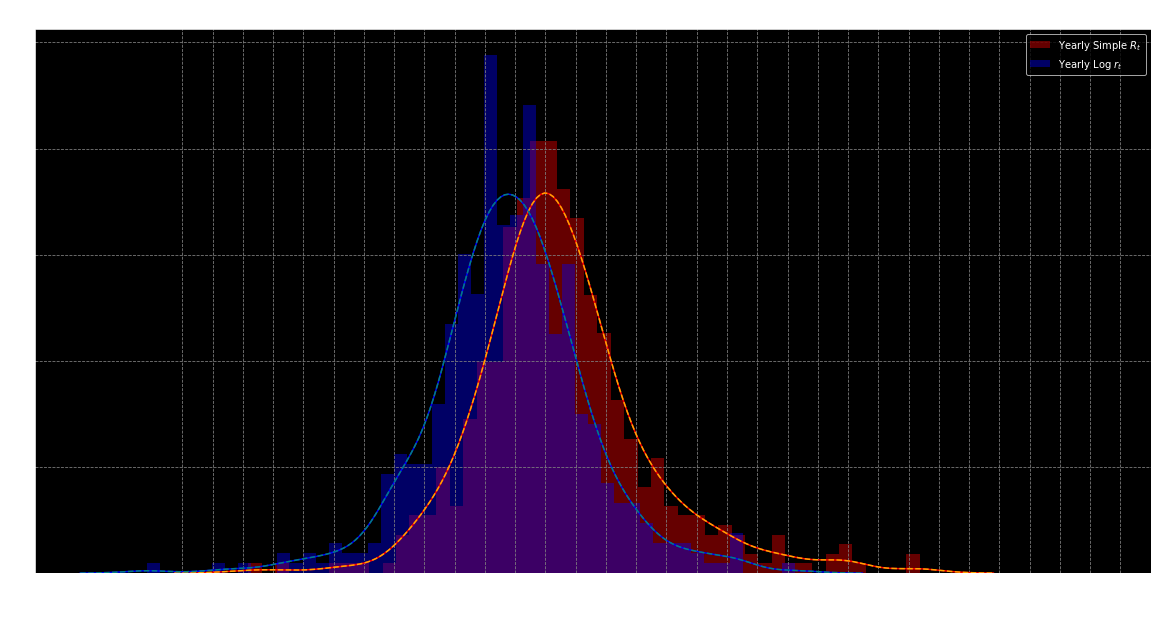

In [112]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(Simple.T.Yr_Return, bins=50, color="red", label="Yearly Simple $R_t$")
sns.distplot(Log.T.Yr_Return, bins=50, color="blue", label="Yearly Log $r_t$")
sns.kdeplot(Simple.T.Yr_Return, color="orange", linestyle="--")
sns.kdeplot(Log.T.Yr_Return, color="teal", linestyle="--")
plt.xlabel("Yearly Returns")
plt.xticks(np.arange(round(min(Simple.T.Yr_Return), 1)*1.5, round(max(Simple.T.Yr_Return), 1)*1.5, 0.05))
plt.xticks(rotation=45)
plt.title("$x_i\in [x_1,x_{500}]$ in S&P500 Yearly Returns", size=20)
plt.ylabel("Frequency")
#gray dashed grid lines
plt.grid(color='gray', linestyle='--')

plt.legend()
plt.show()

### <font color= 'lightblue'> 2. *Descriptive Statistics*: <font>

Statistical descriptions are the foundation of the knowledge from data and valuable insights can be communicated.<br>
In this case, statistical descriptions establish foundations that can analyze new data at any given time and evaluate for example<br>
if it is more feasible due to reasons that aren't captured by data to include $\vec{w_{i\neq j}}$ or have $\vec{w_{i}}$ adjusted and/or discarded from ${max|min}_{\vec{w_i}} R_{j_+}$ 

For future references, fitted params. estimators $f(\hat{X_i})$ will be obtained and their relative qualities assesed.

<span style='color:teal'> <u> *[`vs.selection_data`](https://github.com/EstebanMqz/SP500-Risk-Optimized-Portfolios-PostCovid-ML/blob/main/visualizations.py)*

$x_i\in [x_1 , x_{25}] \hookrightarrow R_{Sortino_{+_{25}}}$

In [11]:
output = 'log_returns'
Box_Stats = pd.DataFrame(((dt.data_describe(SP_Assets_r, output, .00169, start, end).sort_values(by="sortino", 
            ascending=False).head(25).T).iloc[7:, :]).mean(axis=1)).rename(columns={0:"Equiprob. xi mean"})
Box_Stats



,Equiprob. xi mean
log_returns,
Accum_Logret,2.120501
Yr_Return,0.338583
Yr_Std,0.400790
var97.5(-),0.047787
var2.5(+),-0.047594
sharpe,0.844401
sortino,1.183682
Yr_MaxDrawdown,-0.570987


In [55]:
pd.DataFrame(((Sortino.sort_values(by="sortino", ascending=False).head(25).T).iloc[7:, :]).mean(axis=1)).rename(columns={0:"Equiprob. xi mean"})

,Equiprob. xi mean
log_returns,
Accum_Logret,2.120501
Yr_Return,0.338583
Yr_Std,0.400790
var97.5(-),0.047787
var2.5(+),-0.047594
sharpe,0.844401
sortino,1.183682
Yr_MaxDrawdown,-0.570987


In [10]:
prices, r_log, summary_log = vs.selection_data(SP_Assets_r, "Log", rf, best, start, end)
prices, r_simple, summary_simple = vs.selection_data(SP_Assets_r, "Simple", rf, best, start, end)

Log Returns $r_t$ Data Selection from which optimizations will be performed are the following:

In [11]:
d.Markdown(tabulate(summary_log, headers='keys', tablefmt='pipe'))

|      |   $\mu_{i{yr}}$ |   $\sigma_{yr}$ |   $R_{Sharpe}$ |   $R_{Sortino}$ |
|:-----|----------------:|----------------:|---------------:|----------------:|
| LLY  |        0.389078 |        0.333508 |       1.16156  |        1.83883  |
| PWR  |        0.465002 |        0.395741 |       1.17075  |        1.62689  |
| MCK  |        0.309661 |        0.304455 |       1.01155  |        1.49205  |
| EQT  |        0.56255  |        0.637027 |       0.880433 |        1.44133  |
| FSLR |        0.46928  |        0.542319 |       0.862205 |        1.33687  |
| CDNS |        0.358509 |        0.394581 |       0.904298 |        1.26689  |
| NVDA |        0.46995  |        0.554642 |       0.844255 |        1.25997  |
| SNPS |        0.329146 |        0.381763 |       0.857747 |        1.23887  |
| CMG  |        0.313153 |        0.391956 |       0.794637 |        1.18406  |
| GWW  |        0.281367 |        0.32329  |       0.865097 |        1.15575  |
| NUE  |        0.389709 |        0.462014 |       0.839842 |        1.15465  |
| STLD |        0.418085 |        0.500739 |       0.831562 |        1.13154  |
| ABC  |        0.228277 |        0.293917 |       0.770924 |        1.10952  |
| ANET |        0.333834 |        0.424135 |       0.78311  |        1.10943  |
| TSCO |        0.291765 |        0.335655 |       0.864204 |        1.07846  |
| AAPL |        0.271344 |        0.353806 |       0.762153 |        1.06451  |
| IT   |        0.290663 |        0.381371 |       0.757722 |        1.05999  |
| ORLY |        0.287439 |        0.313096 |       0.912656 |        1.03105  |
| GIS  |        0.19679  |        0.241113 |       0.809166 |        1.02754  |
| ON   |        0.464334 |        0.615284 |       0.75192  |        1.0257   |
| AZO  |        0.288956 |        0.318285 |       0.902545 |        1.0184   |
| ORCL |        0.235135 |        0.325226 |       0.717794 |        1.01203  |
| UPS  |        0.219494 |        0.323335 |       0.673618 |        0.985501 |
| FCX  |        0.390078 |        0.576151 |       0.674109 |        0.971247 |
| LIN  |        0.210966 |        0.296352 |       0.706174 |        0.970975 |

<u> [*help(vs.BoxHist)*](https://github.com/EstebanMqz/SP500-Risk-Optimized-Portfolios-PostCovid-ML/blob/main/visualizations.py)

In [59]:
def BoxHist(data, output, bins, color, label, title, start, end):
    """Boxplot and Histogram for selected output method for returns method for data, assuming equiprobable weights.
    Parameters
    ----------
    data : DataFrame
        Data to plot.
    output: str
        'prices' or 'log_returns' string to return its stats.
    bins : int
        Number of bins for histogram.
    color : str
        Color for plots.
    x1_label : str
        x1_label for boxplot.
    x2_label : str
        x2_label for histogram.
    title : str
        Title for both plots.
    start : str
        Start date for Stats calculations from dt.data_describe.
    end : str
        End date for Stats calculations from dt.data_describe.
    Returns
    -------
    Boxplot and Histogram with Stats visualization 


    Returns
    -------
    Boxplot and Histogram of Returns Method with its dt.describe_stats summary with equiprobable weights.
    """
    plt.style.use("classic")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8))
    data.plot.box(ax=ax1, color=color, vert=False)
    Box_Stats = pd.DataFrame(((dt.data_describe(data, output, .00169, start, end).sort_values(by="sortino", 
    ascending=False).head(25).T).iloc[7:, :]).mean(axis=1)).rename(columns={0:"Equiprob. xi mean"})

    plt.text(0.05, 0.05, data.describe().round(6).to_string(), transform=ax1.transAxes)

    ax1.set_xlabel(label)
    sns.histplot(data, bins=bins, kde=True, alpha=0.5, ax=ax2).legend().remove()
    for patch in ax2.patches:
        patch.set_facecolor(color)
    ax2.set_yticklabels(["{:.2f}%".format(x/10000) for x in ax2.get_yticks()])
    ax2.set_ylabel("Probability")
    ax2.set_xlabel(label)
    fig.suptitle(str(label) + title, fontsize=18)
    ax1.grid(color="gray", linestyle="--"), ax2.grid(color="lightgray", linestyle="--")
    #Face color for plots
    ax1.set_facecolor("lightgray"), ax2.set_facecolor("lightgray")

    plt.show()

<u> [*help(vs.BoxHist)*](https://github.com/EstebanMqz/SP500-Risk-Optimized-Portfolios-PostCovid-ML/blob/main/visualizations.py)

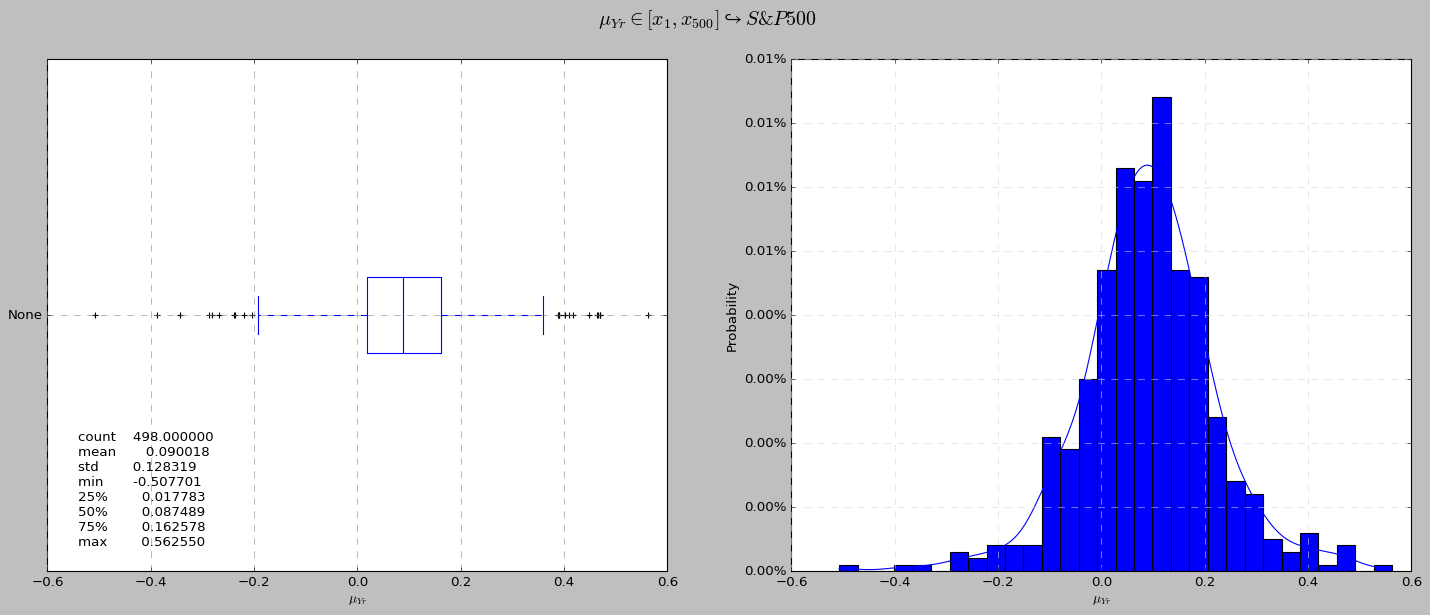

In [31]:
BoxHist(r_log.mean()*252, 30, 'blue', "$\mu_{Yr}{{r_{t}}(x_i)$", "$\in [x_1,x_{500}]$ $\hookrightarrow$ S&P500")

In [28]:
def BoxHistTest(data, bins, color, label, title):
    """Boxplot and Histogram for given data
    ----------
    data : DataFrame
        Data to plot.
    bins : int
        Number of bins for histogram.
    color : str
        Color for plots.
    x1_label : str
        x1_label for boxplot.
    x2_label : str
        x2_label for histogram.
    title : str
        Title for both plots.
    Returns
    -------
    Boxplot and Histogram of data
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8))
    data.plot.box(ax=ax1, color=color, vert=False)
    stats = pd.DataFrame(dt.data_describe(data).mean(axis=1).round(6)).iloc[3:].rename(columns={0:label}).dropna().to_string()
    plt.text(0.05, 0.05, stats, transform=ax1.transAxes)
    ax1.set_xlabel(label)
    sns.histplot(data, bins=bins, kde=True, alpha=0.5, ax=ax2).legend().remove()
    for patch in ax2.patches:
        patch.set_facecolor(color)
    ax2.set_yticklabels(["{:.2f}%".format(x/10000) for x in ax2.get_yticks()])
    ax2.set_ylabel("Probability")
    ax2.set_xlabel(label)
    fig.suptitle(str(label) + title, fontsize=18, fontweight="bold")
    ax1.grid(color="gray", linestyle="--"), ax2.grid(color="lightgray", linestyle="--")

    plt.show()

In [21]:
pd.DataFrame(dt.data_describe(r_simple.sample(100000, replace=True)).mean(axis=1)).iloc[3:].rename(columns={0:"μ(Rt)"}).dropna()

,μ(Rt)
Data_Stats,
min,-0.166529
25%,-0.011588
50%,0.000660
75%,0.013012
max,0.165020
Change,-1.869931
return_y,-248.366857
var97.5,-266.737348
var2.5,235.923951


In [23]:
Xi = pd.DataFrame(r_simple.mean(axis=1)).sample(100000, replace=True)
Xi.sort_index(inplace=True)
Xi = Xi.groupby(Xi.index).mean()
Xi.head()

,0
formatted_date,
2020-03-03,-0.024616
2020-03-04,0.038751
2020-03-05,-0.035667
2020-03-06,-0.020621
2020-03-09,-0.088776


In [24]:
dt.data_describe(Xi)

,0
Data_Stats,
count,811.000000
mean,0.000699
std,274.333863
min,-0.127111
25%,-0.006645
50%,0.001083
75%,0.008164
max,0.115792
Change,-0.887854


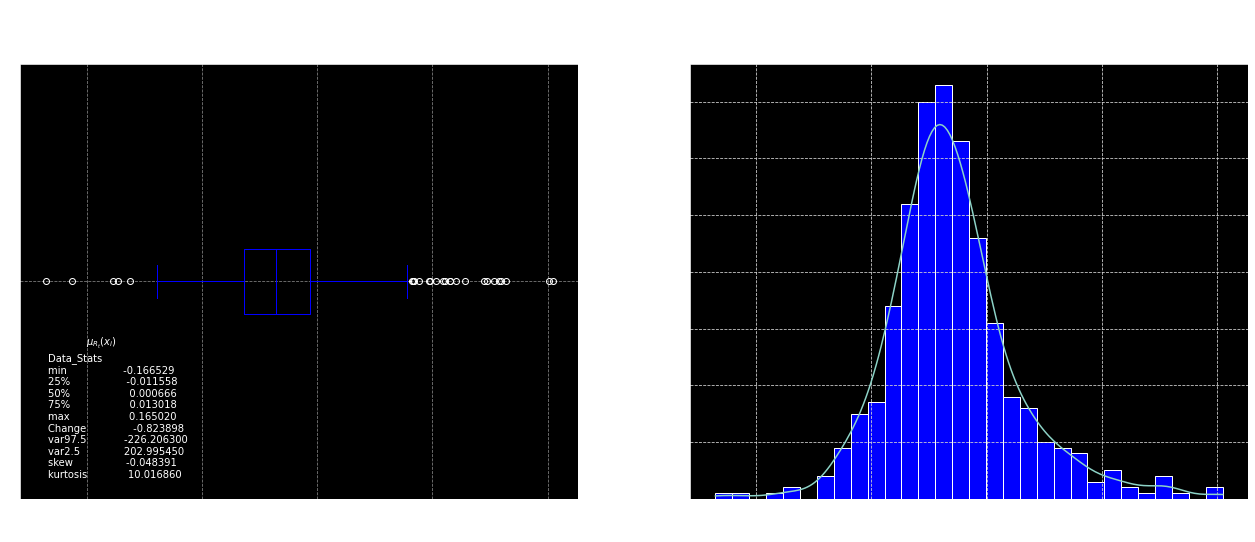

In [135]:
BoxHistTest(r_simple.mean().to_frame(), 30, 'blue', "$\mu_{R_{t}}(x_i)$", " Simple Returns $X_i\sim N({\mu}_{R_t}, {\sigma^2}_{R_t})$ in S&P500")
#vs.BoxHist(r_simple.var().to_frame().sample(100000, replace=True).rename(columns={0:"σ(Rt)"}), 20, 'blue', "$\sigma^2_{R_{t}}(X_i)$", " Simple Returns Variance Simulations $X_i\in [X_1,X_{500}]$")

<span style='color:white'>

Log Returns $r_{t_n}$ :

In [13]:
prices, r_log, summary_log = vs.selection_data(SP_Assets_r, "Log", rf, best, start, execution_date)
r_log.tail()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AMD,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,AON,APA,AAPL,AMAT,APTV,ACGL,ANET,AJG,AIZ,T,ATO,ADSK,AZO,AVB,AVY,AXON,BKR,BALL,BAC,BBWI,BAX,BDX,WRB,BRK-B,BBY,BIO,TECH,BIIB,BLK,BK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BRO,BF-B,BG,CHRW,CDNS,CZR,CPT,CPB,COF,CAH,KMX,CCL,CTLT,CAT,CBOE,CBRE,CDW,CE,CNC,CNP,CDAY,CF,CRL,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,COO,CPRT,GLW,CTVA,CSGP,COST,CTRA,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DXCM,FANG,DLR,DFS,DISH,DIS,DG,DLTR,D,DPZ,DOV,DOW,DTE,DUK,DD,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,ELV,LLY,EMR,ENPH,ETR,EOG,EPAM,EQT,EFX,EQIX,EQR,ESS,EL,ETSY,RE,EVRG,ES,EXC,EXPE,EXPD,EXR,XOM,FFIV,FDS,FICO,FAST,FRT,FDX,FITB,FSLR,FE,FIS,FISV,FLT,FMC,F,FTNT,FTV,FOXA,FOX,BEN,FCX,GRMN,IT,GEN,GNRC,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,HAL,HIG,HAS,HCA,PEAK,HSIC,HSY,HES,HPE,HLT,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUM,HBAN,HII,IBM,IEX,IDXX,ITW,ILMN,INCY,IR,PODD,INTC,ICE,IFF,IP,IPG,INTU,ISRG,IVZ,INVH,IQV,IRM,JBHT,JKHY,J,JNJ,JCI,JPM,JNPR,K,KDP,KEY,KEYS,KMB,KIM,KMI,KLAC,KHC,KR,LHX,LH,LRCX,LW,LVS,LDOS,LEN,LNC,LIN,LYV,LKQ,LMT,L,LOW,LYB,MTB,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MTCH,MKC,MCD,MCK,MDT,MRK,META,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MRNA,MHK,MOH,TAP,MDLZ,MPWR,MNST,MCO,MS,MOS,MSI,MSCI,NDAQ,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NKE,NI,NDSN,NSC,NTRS,NOC,NCLH,NRG,NUE,NVDA,NVR,NXPI,ORLY,OXY,ODFL,OMC,ON,OKE,ORCL,PCAR,PKG,PARA,PH,PAYX,PAYC,PYPL,PNR,PEP,PFE,PCG,PM,PSX,PNW,PXD,PNC,POOL,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PTC,PSA,PHM,QRVO,PWR,QCOM,DGX,RL,RJF,RTX,O,REG,REGN,RF,RSG,RMD,RVTY,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SPG,SWKS,SJM,SNA,SEDG,SO,LUV,SWK,SBUX,STT,STLD,STE,SYK,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TRGP,TGT,TEL,TDY,TFX,TER,TSLA,TXN,TXT,TMO,TJX,TSCO,TT,TDG,TRV,TRMB,TFC,TYL,TSN,USB,UDR,ULTA,UNP,UAL,UPS,URI,UNH,UHS,VLO,VTR,VRSN,VRSK,VZ,VRTX,VFC,VTRS,VICI,V,VMC,WAB,WBA,WMT,WBD,WM,WAT,WEC,WFC,WELL,WST,WDC,WRK,WY,WHR,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
formatted_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-05-10,0.000992,-0.001444,0.003983,-0.002796,0.020325,0.006468,-0.005078,0.003990,0.006299,0.002228,0.016478,-0.010437,0.005560,0.003601,0.081056,-0.018159,-0.003387,0.008624,0.008290,0.004256,0.013874,-0.006354,0.040170,0.039420,-0.010825,0.032935,0.007729,0.020409,0.010748,-0.009025,0.006783,-0.031122,-0.009271,0.014569,0.012499,-0.009002,0.007402,0.001868,-0.001366,0.003584,0.010026,0.007329,-0.003470,-0.010916,0.010367,0.013697,0.016359,0.007931,0.019446,0.005722,-0.010470,0.001174,0.006812,0.018456,0.002615,0.004618,0.013892,-0.163131,-0.010699,-0.007039,-0.012368,-0.012799,0.017488,0.005592,0.000678,-0.005804,-0.005936,-0.003194,0.001479,-0.002359,-0.010105,-0.012597,-0.005165,0.004170,-0.004503,-0.007480,0.002446,0.007180,0.012468,0.014965,0.000305,0.006717,0.003242,-0.009197,0.000784,-0.016874,0.000181,-0.004589,-0.022381,0.009792,0.012060,-0.015137,-0.042262,-0.001500,0.017413,0.005843,0.005351,-0.015521,-0.011303,0.002314,0.012207,0.000000,-0.006314,-0.008168,0.002769,-0.012840,0.010853,-0.005025,0.002810,0.002508,-0.009713,0.024590,0.005151,-0.003230,-0.025269,0.002376,0.003676,0.010890,0.001734,0.014977,0.005688,0.006039,-0.035052,-0.028435,-0.010495,0.006459,0.003233,0.014455,0.006270,0.004163,0.008198,0.019405,-0.002259,-0.015416,0.016102,-0.006580,-0.025151,-0.003723,-0.002021,-0.007384,-0.008484,-0.014501,-0.002756,-0.011765,0.002685,-0.021794,0.024111,-0.012111,0.023124,

$\therefore$ Random variables $\bold{X_i\sim N(\mu_{r_{t}}, \sigma^2_{r_{t}})}$ :

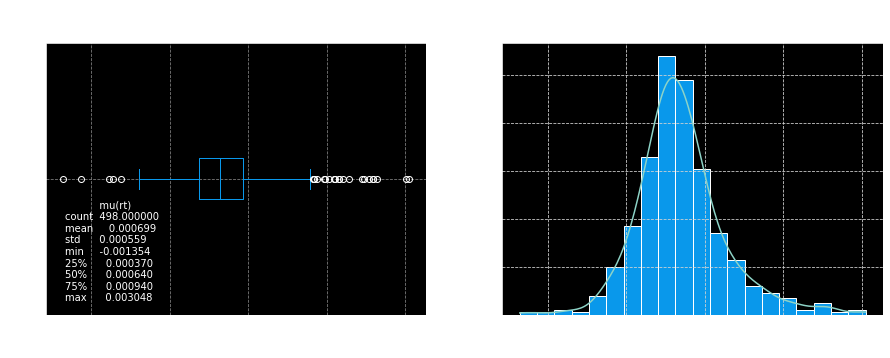

In [134]:
vs.BoxHist(r_log.mean().to_frame().rename(columns={0:"mu(rt)"}), 20, '#0998eb', "$\mu_{r_{t}}(X_i)$", " Log Returns Mean Simulations$_{100k}$ $X_i\in [X_1,X_{500}]$")
#vs.BoxHist(r_log.var().to_frame().sample(100000, replace=True).rename(columns={0:"σ(Rt)"}), 20, 'lightblue', "$\sigma^2_{R_{t}}(X_i)$", " Log Returns Variance Simulations $X_i\in [X_1,X_{500}]$")

The Simple Returns mean differ from Log Returns just enough for the model not to be modelled correctly.<br>
Nevertheless, compounding effects among other factors make Log Returns best suitable for the model. 

##### <font color= 'lightblue'> 

2.1.3 Cumulative $\bold{_{R_{t}}(X_i)}$ $\&$ Log $\bold{\mu_{r_{t}}(X_i)}$

<span style='color:white'>

Simple Returns $R_{t}$ :

In [163]:
r_simple_acum = ((1+r_simple).cumprod()-1)
r_simple_acum = r_simple_acum.T[(r_simple_acum.T >= -1) & (r_simple_acum.T <= 1)].T
r_simple_acum = r_simple_acum.fillna(method='ffill')
r_simple_acum.tail()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AMD,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,AON,APA,AAPL,AMAT,APTV,ACGL,ANET,AJG,AIZ,T,ATO,ADSK,AZO,AVB,AVY,AXON,BKR,BALL,BAC,BBWI,BAX,BDX,WRB,BRK-B,BBY,BIO,TECH,BIIB,BLK,BK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BRO,BF-B,BG,CHRW,CDNS,CZR,CPT,CPB,COF,CAH,KMX,CCL,CTLT,CAT,CBOE,CBRE,CDW,CE,CNC,CNP,CDAY,CF,CRL,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,COO,CPRT,GLW,CTVA,CSGP,COST,CTRA,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DXCM,FANG,DLR,DFS,DISH,DIS,DG,DLTR,D,DPZ,DOV,DOW,DTE,DUK,DD,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,ELV,LLY,EMR,ENPH,ETR,EOG,EPAM,EQT,EFX,EQIX,EQR,ESS,EL,ETSY,RE,EVRG,ES,EXC,EXPE,EXPD,EXR,XOM,FFIV,FDS,FICO,FAST,FRT,FDX,FITB,FSLR,FE,FIS,FISV,FLT,FMC,F,FTNT,FTV,FOXA,FOX,BEN,FCX,GRMN,IT,GEN,GNRC,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,HAL,HIG,HAS,HCA,PEAK,HSIC,HSY,HES,HPE,HLT,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUM,HBAN,HII,IBM,IEX,IDXX,ITW,ILMN,INCY,IR,PODD,INTC,ICE,IFF,IP,IPG,INTU,ISRG,IVZ,INVH,IQV,IRM,JBHT,JKHY,J,JNJ,JCI,JPM,JNPR,K,KDP,KEY,KEYS,KMB,KIM,KMI,KLAC,KHC,KR,LHX,LH,LRCX,LW,LVS,LDOS,LEN,LNC,LIN,LYV,LKQ,LMT,L,LOW,LYB,MTB,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MTCH,MKC,MCD,MCK,MDT,MRK,META,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MRNA,MHK,MOH,TAP,MDLZ,MPWR,MNST,MCO,MS,MOS,MSI,MSCI,NDAQ,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NKE,NI,NDSN,NSC,NTRS,NOC,NCLH,NRG,NUE,NVDA,NVR,NXPI,ORLY,OXY,ODFL,OMC,ON,OKE,ORCL,PCAR,PKG,PARA,PH,PAYX,PAYC,PYPL,PNR,PEP,PFE,PCG,PM,PSX,PNW,PXD,PNC,POOL,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PTC,PSA,PHM,QRVO,PWR,QCOM,DGX,RL,RJF,RTX,O,REG,REGN,RF,RSG,RMD,RVTY,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SPG,SWKS,SJM,SNA,SEDG,SO,LUV,SWK,SBUX,STT,STLD,STE,SYK,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TRGP,TGT,TEL,TDY,TFX,TER,TSLA,TXN,TXT,TMO,TJX,TSCO,TT,TDG,TRV,TRMB,TFC,TYL,TSN,USB,UDR,ULTA,UNP,UAL,UPS,URI,UNH,UHS,VLO,VTR,VRSN,VRSK,VZ,VRTX,VFC,VTRS,VICI,V,VMC,WAB,WBA,WMT,WBD,WM,WAT,WEC,WFC,WELL,WST,WDC,WRK,WY,WHR,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
formatted_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-05-10,-0.261376,0.792861,0.429992,0.906908,0.485205,0.276236,0.981963,-0.045132,0.410984,0.015539,0.362520,0.592890,0.596486,0.312352,-0.059069,-0.138317,0.983838,-0.139311,0.325949,-0.067798,0.098705,0.127131,0.612182,0.616575,0.417124,0.127869,0.213656,0.892962,0.158852,-0.239661,0.079502,0.366986,0.351229,-0.123808,0.205875,0.982718,0.99727,0.643495,0.207798,0.643475,0.722608,0.142962,0.549864,0.340790,0.992048,0.974647,0.155044,0.817369,0.999288,0.988963,0.069535,-0.208343,0.192483,0.028769,0.999904,-0.037244,0.514540,0.821715,0.789926,-0.224477,0.002665,0.826102,-0.472851,0.096822,0.333360,0.484124,0.010648,-0.008836,0.661663,-0.044619,0.396983,0.106874,-0.305701,0.530336,0.439136,-0.565533,0.390645,0.255937,0.992453,0.542656,0.478579,0.047401,0.992384,0.553919,0.993856,-0.016949,0.107328,0.251065,0.002560,0.764673,-0.181970,-0.682698,-0.370266,0.803917,0.171518,0.268431,0.454766,0.149438,0.205988,0.379119,-0.211427,0.911339,0.133901,0.177848,-0.316195,0.868460,0.994069,0.407263,0.329915,0.409131,0.123737,0.747508,0.256038,-0.224034,-0.117083,0.068151,-0.006314,0.059168,0.256843,0.064491,0.208666,0.012326,-0.256081,0.449666,0.989285,0.318541,0.337949,0.165898,0.845657,0.380644,0.973084,0.069000,0.699669,0.997592,-0.150528,0.399582,0.494933,0.187653,0.997687,0.567949,0.631687,0.207224,0.971422,-0.283291,-0.144474,0.933551,0.715886,0.98078,-0.150627,0.504428,-0.816778,-0.157026,0.404

$\therefore$ Random variables $\bold{X_i\sim N(\mu_{R_{t}}, \sigma^2_{R_{t}})}$ :

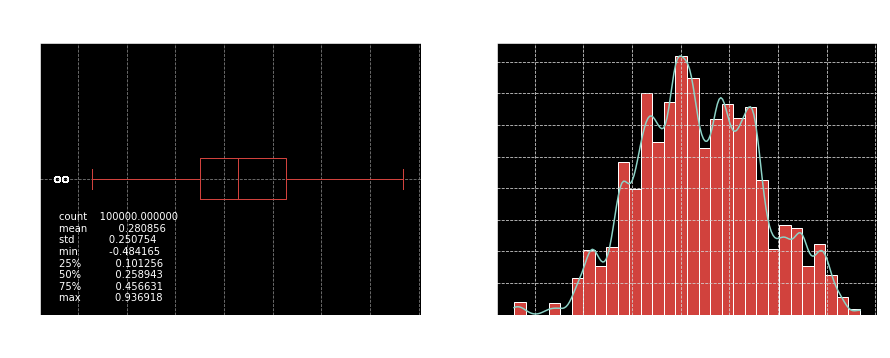

In [165]:
vs.BoxHist(r_simple_acum.mean().sample(100000, replace=True).rename(index={0:"Accum_mu(Rt)"}), 30, '#d1423d', "Accum. $\mu_{R_{t}}(X_i)$", "Simple Returns Mean Simulations$_{100k}$ $X_i\in [X_1,X_{500}]$")

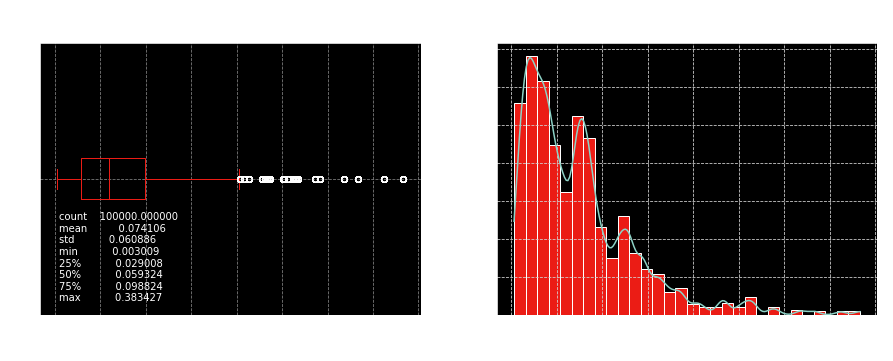

In [190]:
vs.BoxHist(r_simple_acum.var().sample(100000, replace=True).rename(index={0:"Accum_s(Rt)"}), 30, '#eb1c15', "Accum. $\sigma^2_{R_{t}}(X_i)$", "Simple Returns Variance Simulations$_{100k}$ $X_i\in [X_1,X_{500}]$")

<span style='color:white'>

Log Returns $r_{t_n}$ :

In [181]:
r_log_acum = ((1+r_log).cumprod()-1)
r_log_acum.tail()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AMD,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,AON,APA,AAPL,AMAT,APTV,ACGL,ANET,AJG,AIZ,T,ATO,ADSK,AZO,AVB,AVY,AXON,BKR,BALL,BAC,BBWI,BAX,BDX,WRB,BRK-B,BBY,BIO,TECH,BIIB,BLK,BK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BRO,BF-B,BG,CHRW,CDNS,CZR,CPT,CPB,COF,CAH,KMX,CCL,CTLT,CAT,CBOE,CBRE,CDW,CE,CNC,CNP,CDAY,CF,CRL,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,COO,CPRT,GLW,CTVA,CSGP,COST,CTRA,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DXCM,FANG,DLR,DFS,DISH,DIS,DG,DLTR,D,DPZ,DOV,DOW,DTE,DUK,DD,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,ELV,LLY,EMR,ENPH,ETR,EOG,EPAM,EQT,EFX,EQIX,EQR,ESS,EL,ETSY,RE,EVRG,ES,EXC,EXPE,EXPD,EXR,XOM,FFIV,FDS,FICO,FAST,FRT,FDX,FITB,FSLR,FE,FIS,FISV,FLT,FMC,F,FTNT,FTV,FOXA,FOX,BEN,FCX,GRMN,IT,GEN,GNRC,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,HAL,HIG,HAS,HCA,PEAK,HSIC,HSY,HES,HPE,HLT,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUM,HBAN,HII,IBM,IEX,IDXX,ITW,ILMN,INCY,IR,PODD,INTC,ICE,IFF,IP,IPG,INTU,ISRG,IVZ,INVH,IQV,IRM,JBHT,JKHY,J,JNJ,JCI,JPM,JNPR,K,KDP,KEY,KEYS,KMB,KIM,KMI,KLAC,KHC,KR,LHX,LH,LRCX,LW,LVS,LDOS,LEN,LNC,LIN,LYV,LKQ,LMT,L,LOW,LYB,MTB,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MTCH,MKC,MCD,MCK,MDT,MRK,META,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MRNA,MHK,MOH,TAP,MDLZ,MPWR,MNST,MCO,MS,MOS,MSI,MSCI,NDAQ,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NKE,NI,NDSN,NSC,NTRS,NOC,NCLH,NRG,NUE,NVDA,NVR,NXPI,ORLY,OXY,ODFL,OMC,ON,OKE,ORCL,PCAR,PKG,PARA,PH,PAYX,PAYC,PYPL,PNR,PEP,PFE,PCG,PM,PSX,PNW,PXD,PNC,POOL,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PTC,PSA,PHM,QRVO,PWR,QCOM,DGX,RL,RJF,RTX,O,REG,REGN,RF,RSG,RMD,RVTY,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SPG,SWKS,SJM,SNA,SEDG,SO,LUV,SWK,SBUX,STT,STLD,STE,SYK,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TRGP,TGT,TEL,TDY,TFX,TER,TSLA,TXN,TXT,TMO,TJX,TSCO,TT,TDG,TRV,TRMB,TFC,TYL,TSN,USB,UDR,ULTA,UNP,UAL,UPS,URI,UNH,UHS,VLO,VTR,VRSN,VRSK,VZ,VRTX,VFC,VTRS,VICI,V,VMC,WAB,WBA,WMT,WBD,WM,WAT,WEC,WFC,WELL,WST,WDC,WRK,WY,WHR,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
formatted_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-05-10,-0.352609,0.509598,0.245543,0.707755,0.257566,0.073737,0.770212,-0.279678,0.199899,-0.192505,0.020848,0.277314,0.364365,0.113851,-0.202358,-0.474844,0.473929,-0.275129,-0.225194,-0.230778,-0.030547,-0.051584,0.326111,0.331458,0.253921,-0.119499,0.015936,0.257087,0.009680,-0.649993,-0.040959,0.004128,-0.073971,-0.264417,0.034479,0.448232,0.769748,0.395481,0.078206,0.409627,0.362040,-0.106268,0.338403,-0.750438,0.936246,0.298529,-0.303940,0.426406,1.154338,0.907986,-0.126773,-0.305194,0.040412,-0.254581,1.210399,-0.206465,0.237677,0.471417,0.161762,-0.370195,-0.230601,-0.110200,-0.550125,-0.015234,0.110049,0.344265,-0.249543,-0.216076,0.323209,-0.358936,0.134459,-0.102137,-0.608914,0.154967,0.112457,-0.671242,0.178584,0.156797,0.909977,0.352749,0.272669,-0.083676,0.581882,0.339634,1.327660,-0.736955,-0.072009,0.123861,-0.350772,0.480234,-0.464371,-0.913816,-0.625421,0.476711,-0.005877,-0.066021,0.171672,-0.132602,-0.048372,0.086260,-0.488592,0.309588,-0.158017,-0.124950,-0.438931,0.400311,1.092314,0.177062,0.202470,0.138288,-0.145117,0.418931,0.078501,-0.441970,-0.437954,-0.072114,-0.165633,-0.062110,0.147160,-0.137588,0.115568,-0.133141,-0.576919,0.305336,0.482169,0.166889,0.143269,-0.018600,0.533366,0.109852,0.714600,-0.158227,0.521783,0.463019,-0.277207,0.171147,0.266367,0.038094,0.460407,0.349372,0.037237,-0.073336,0.942415,-0.578762,-0.325810,0.579507,0.169491,-0.094992,-0.2967

$\therefore$ Random variables $\bold{X_i\sim N(\mu_{R_{t}}, \sigma^2_{R_{t}})}$ :

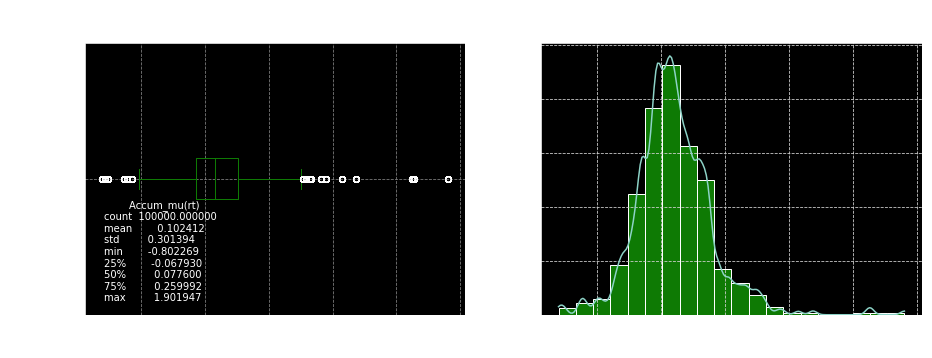

In [182]:
vs.BoxHist(r_log_acum.mean().to_frame().sample(100000, replace=True).rename(columns={0:"Accum_mu(rt)"}), 20, '#0e7a04', "$\mu_{r_{t}}(X_i)$", " Log Returns Mean Simulations $X_i\in [X_1,X_{500}]$")
#vs.BoxHist(r_log.var().to_frame().sample(100000, replace=True).rename(columns={0:"σ(Rt)"}), 20, 'green', "$\sigma^2_{R_{t}}(X_i)$", " Log Returns Variance Simulations $X_i\in [X_1,X_{500}]$")

In [187]:
print("Outliers:", len(r_log_acum.mean(axis=1)[abs(r_log_acum.mean(axis=1) - np.mean(r_log_acum.mean(axis=1))) < 2 * np.std(r_log_acum.mean(axis=1))].to_frame())/100000)

Outliers: 0.00769


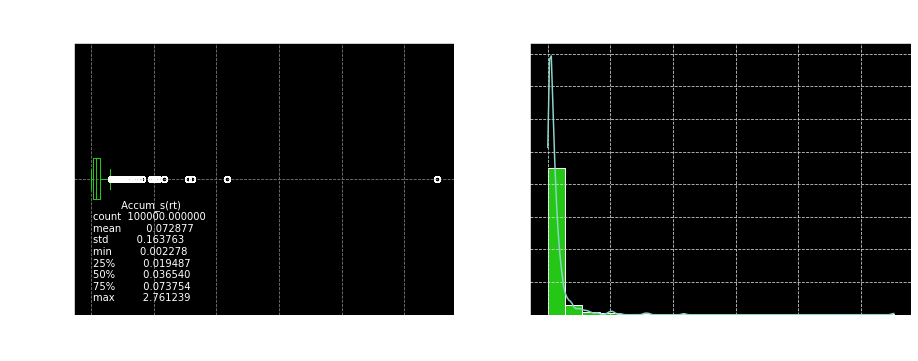

In [191]:
vs.BoxHist(r_log_acum.var().to_frame().sample(100000, replace=True).rename(columns={0:"Accum_s(rt)"}), 20, '#25c716', "Accum. $\sigma^2_{r_{t}}(X_i)$", " Log Returns Variance Simulations $X_i\in [X_1,X_{500}]$")

<div class="alert alert-block alert-info">

Sharpe's Ratio measures the units of risk *($\small \sigma$)* per unit of excess returns over a risk-free rate *($\small rf$)* :
+ $R_{Sharpe} = \frac{\mu_i - {rf}}{\sigma_i(r_t)}$.
<br>

Sortino's Ratio measures the units of negative risks *[$\sigma_{i}\small(r_{t\leq 0})$]* per unit of excess returns over a risk-free rate *($\small rf$)* :
+ $R_{Sortino} = \frac{\mu_i - {rf}}{\sigma_{i}(r_{t\leq 0})}$ 

To avoid risks associated to negative returns, Data Selection $\forall X_i\in [X_1,X_{500}] \rightarrow X_{P{_{R{max_{j}}}}}$ is based on $S\&P500$ *Sortino's Ratio Top 25*:

In [ ]:
fn.retSLog_Selection(SP_Assets_r, rf, best, start, execution_date)


In [ ]:
vs.Selection_R_SLog_Plot(SP_Assets_r, rf, best, start, execution_date, r_jump)

##### <font color= 'lightblue'> 2.2 <u> Modelling $X_i$ <u> <font>

In [ ]:
def Stats(dataframe, Selection, r, P, percentiles, dist, title, color):
    """
    Stats is a function that resamples data from a Selection performed over a dataframe.
    Parameters:
    ----------
    dataframe : dataframe
        Dataframe from which the Selection is made, in order to acess Selection's original data.
    Selection : list
        Selection to Resample for given period(s) etc. basis whose period is longer than original data.
    r : str
        Type of return for the model: "Simple" (multiplicative) or "Log" (additive).
    P : str
        Period of Resample (e.g. "W" for Weekly, "M" for Monthly, "3T" for Trimestral, "Q" for Quarterly,
        "Y" for Yearly, etc. for Dataframe.resample (see refs.).
    percentiles : list
        List of Returns of Percentiles returned by vs.Stats[0] dataframe (e.g. [.05, .25, .5, .75, .95]).
    dist : list
        Continuous Distributions to fit on datasets Xi
    title : str
        Title of the Box-plot
    color : str
        Color of the Box-plot.
    Returns:
    -------
    describe : dataframe
        Stats returns summary statistics (mean, std, min, max, percentiles, skewness and kurtosis) in a 
        markdown object callable as a dataframe by assigning a variable to the function in pos. [2].  
    """
    
    if  r == "Simple" :
        Selection = (dataframe[Selection.index].pct_change()).iloc[1:, :].dropna(axis = 1)
    if  r == "Log" :
        Selection = np.log(dataframe[Selection.index]).diff().iloc[1:, :].dropna(axis = 1)
    if r != "Simple" and r != "Log" :
        print("Aborted: Please select a valid Return type: 'Simple' or 'Log'. Stats help command: help(vs.Stats)")
    
    Selection.index = pd.to_datetime(Selection.index)
    Selection_Mo_r = Selection.resample(P).agg(lambda x: x[-1])
    Selection_Mo_r.plot(kind = "box", figsize = (22, 13), title = title, color = color, fontsize = 13)
    
    for i in range(0, len(Selection_Mo_r.columns)):
        plt.text(x = i + 0.96 , y = Selection_Mo_r.iloc[:, i].mean() + .0075, s = str("$\mu$ = +") + str(round(Selection_Mo_r.iloc[:, i].mean(), 4)), fontsize = 6.5, fontweight = "bold", color = "lightgreen")
        plt.text(x = i + 0.98 , y = Selection_Mo_r.iloc[:, i].max() + .010, s = str("+") + str(round(Selection_Mo_r.iloc[:, i].max(), 3)), fontsize = 8.5, color = "green")
        plt.text(x = i + 0.98 , y = Selection_Mo_r.iloc[:, i].min() - .015, s = str(round(Selection_Mo_r.iloc[:, i].min(), 3)), fontsize = 8.5, color = "red")

    describe = Selection_Mo_r.describe(percentiles)
    describe["mode"] = Selection_Mo_r.mode().iloc[0, :]
    describe["skewness"] = st.skew(Selection_Mo_r)
    describe["kurtosis"] = st.kurtosis(Selection_Mo_r)
    describe.replace("\n", "")

    dist_fit = np.empty(len(Selection_Mo_r.columns), dtype=object)
    
    for i in range(0, len(Selection.columns)):
        f = Fitter(pd.DataFrame(Selection_Mo_r.iloc[:, i]), distributions = dist, timeout=5)
        f.fit()
        params, AIC, BIC = [StringIO() for i in range(3)]
        (print(f.get_best(), file=params)), (print(f.get_best(method="aic"), file=AIC)), (print(f.get_best(method="bic"), file=BIC))
        params, AIC, BIC = [i.getvalue() for i in [params, AIC, BIC]]
        dist_fit[i] = (params + AIC + BIC).replace("\n", ", ")
    
    plt.title(title, fontsize = 20)
    plt.axhline(0, color = "red", lw = .5, linestyle = "--")
    plt.axhspan(0, Selection_Mo_r.min().min(), facecolor = "red", alpha = 0.2) 
    plt.axhspan(0, Selection_Mo_r.max().max(), facecolor = "green", alpha = 0.2)

    plt.xticks(rotation = 45)
    for i, t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if (i % 2) != 0:
            t.set_color("lightgreen")
        else:
            t.set_color("white")
            
    plt.yticks(np.arange(round(Selection_Mo_r.min().min(), 1), round(Selection_Mo_r.max().max(), 1), 0.05))
    plt.grid(alpha = 0.5, linestyle = "--", color = "grey")
    IPython.core.display.clear_output() 
    return describe, dist_fit, plt.show()

In [ ]:
Sortino25[2]

In [ ]:
Selection.tail()

In [ ]:
(SP_Assets_r.loc[start:today][Sortino25[2].index]).pct_change().iloc[1:, :].dropna(axis = 1).tail()

In [ ]:
np.log(SP_Assets_r.loc[start:today][Sortino25[2].index]).diff().iloc[1:, :].dropna(axis = 1).tail()

In [ ]:
SP_Assets_r.loc[start:today], Sortino25[2]

In [ ]:
dist=([d for d in dir(st) if isinstance(getattr(st, d), getattr(st, "rv_continuous"))])[0:60]

def ret(dataframe, selection, r):
    if  r == "Simple" :
        returns = (dataframe[selection.index]).pct_change().iloc[1:, :].dropna(axis = 1)
    if  r == "Log" :
        returns = np.log(dataframe[selection.index]).diff().iloc[1:, :].dropna(axis = 1)   
    if r != "Simple" and r != "Log" :
        print("Aborted: Please select a valid Return type: 'Simple' or 'Log'. selection_data help command: help(vs.selection_data)")
    
    returns.index = pd.to_datetime(returns.index)
    returns_Mo_r = returns.resample("M").agg(lambda x: x[-1])
    returns_Mo_r.plot(kind = "box", figsize = (22, 13), title = "test", color = "yellow", fontsize = 13)

    return returns, returns_Mo_r.max()

ret(SP_Assets_r.loc[start:today], Sortino25[2], "Simple")[1]


#Selection.index = pd.to_datetime(Sortino25[2].index)
# Selection_Mo_r = Selection.resample(P).agg(lambda x: x[-1])
# Selection_Mo_r.plot(kind = "box", figsize = (22, 13), title = title, color = color, fontsize = 13)

# for i in range(0, len(Selection_Mo_r.columns)):
#     plt.text(x = i + 0.96 , y = Selection_Mo_r.iloc[:, i].mean() + .0075, s = str("$\mu$ = +") + str(round(Selection_Mo_r.iloc[:, i].mean(), 4)), fontsize = 6.5, fontweight = "bold", color = "lightgreen")
#     plt.text(x = i + 0.98 , y = Selection_Mo_r.iloc[:, i].max() + .010, s = str("+") + str(round(Selection_Mo_r.iloc[:, i].max(), 3)), fontsize = 8.5, color = "green")
#     plt.text(x = i + 0.98 , y = Selection_Mo_r.iloc[:, i].min() - .015, s = str(round(Selection_Mo_r.iloc[:, i].min(), 3)), fontsize = 8.5, color = "red")

# describe = Selection_Mo_r.describe(percentiles)
# describe["mode"] = Selection_Mo_r.mode().iloc[0, :]
# describe["skewness"] = st.skew(Selection_Mo_r)
# describe["kurtosis"] = st.kurtosis(Selection_Mo_r)
# describe.replace("\n", "")

# dist_fit = np.empty(len(Selection_Mo_r.columns), dtype=object)

# for i in range(0, len(Selection.columns)):
#     f = Fitter(pd.DataFrame(Selection_Mo_r.iloc[:, i]), distributions = dist, timeout=5)
#     f.fit()
#     params, AIC, BIC = [StringIO() for i in range(3)]
#     (print(f.get_best(), file=params)), (print(f.get_best(method="aic"), file=AIC)), (print(f.get_best(method="bic"), file=BIC))
#     params, AIC, BIC = [i.getvalue() for i in [params, AIC, BIC]]
#     dist_fit[i] = (params + AIC + BIC).replace("\n", ", ")

# plt.title(title, fontsize = 20)
# plt.axhline(0, color = "red", lw = .5, linestyle = "--")
# plt.axhspan(0, Selection_Mo_r.min().min(), facecolor = "red", alpha = 0.2) 
# plt.axhspan(0, Selection_Mo_r.max().max(), facecolor = "green", alpha = 0.2)

# plt.xticks(rotation = 45)
# for i, t in enumerate(plt.gca().xaxis.get_ticklabels()):
#     if (i % 2) != 0:
#         t.set_color("lightgreen")
#     else:
#         t.set_color("white")
        
# plt.yticks(np.arange(round(Selection_Mo_r.min().min(), 1), round(Selection_Mo_r.max().max(), 1), 0.05))
# plt.grid(alpha = 0.5, linestyle = "--", color = "grey")
# plt.show()

$r_{Log}(X_i)$

In [ ]:
Selection = np.log(dataframe[Selection.index]).diff().iloc[1:, :].dropna(axis = 1)

In [ ]:
#Stats(dataframe, Selection, r, P, percentiles, dist, title, color):
describe_Wk = Stats(SP_Assets_r.loc[start:today], Sortino25[2], "Log", "W", [.025, .25, .5, .75, .95], dist, 
                    "$S&P$ 500 $r_{Log}(X_i)$ Selection Weekly Resampling from" + str(start) + "to" + str(today), "lightyellow")

In [ ]:
describe_Wk[0]

In [ ]:
describe_Mo = vs.Stats(SP_Assets_r.loc["2020-03-02":today], Sortino25[2], P[1][0],
                  "$X_i$ Selection Resamplings from $S&P$ 500 on a " + str(P[1][1]) + " basis from ", "2020-03-02", today,
                  [.025, .25, .5, .75, .95], dist, color=color[1])
                  

In [ ]:
describe_Mo[0]

In [ ]:
describe_Qt = vs.Stats(SP_Assets_r.loc["2020-03-02":today], Sortino25[2], P[2][0],
                  "$X_i$ Selection Resamplings from $S&P$ 500 on a " + str(P[2][1]) + " basis from ", "2020-03-02", today,
                  [.025, .25, .5, .75, .95], dist, color=color[2])

In [ ]:
describe_Qt[0]

##### <font color= 'black'> Estimators Parameters:
$f(X_i)$ and $AIC$ $\&$ $BIC$: <br>

Distributions and parameters that best estimate $f(X_i)$ are obtained from $104$ distribution classes and instances for continuous random variables in `Fitter` module  *(see refs.)*. <br>

The *$AIC$ Akaike $\&$ $BIC$ Bayesian Information Criterion* models are estimators of *relative quality* of predictions in the *Log-Likelihood* for fitted distributions.<br>
Minimum relative values for $AIC$ and $BIC$ are usually preferred and in this case, they are obtained to model $X_i$ resampled data on $W, M$   $\&$ $Q$ periods $P$.<br>
Criterion's goodness of fit is inversely related so they tend to be used together to avoid under/over fitting and they are defined as follows:
+ $AIC = 2k - 2ln(\hat{L})$<br>
+ $BIC = kln(n) - 2ln(\hat{L})$<br>

*where:*<br>

 $k$ = Params. in  model.<br>
 $n$ = No° of observations.<br>
 $\hat{L}$ = $Likelihood_{f_{max.}}$.<br>

In [ ]:
dist_fit=pd.DataFrame([describe_Wk[1], describe_Mo[1], describe_Qt[1]]).T
dist_fit_format = fn.format_table(dist_fit, Sortino25[2])
dist_fit_format

### <font color= 'blue'> 

### 3. Descriptive and Prescriptive Analytics for $X_P$ 

##### <font color= 'blue'> 3.1 <u>$X_P$<u> Optimizations Models <font>

<span style='color:gray'> *Equal weighted datasets are omitted from the analysis for simplicity purposes.*

<span style='color:black'>

If we have $n$ *unequally* weighted datasets $X_i=1,2,.., n$, to model $X_P$ we need $\mu_P$ $\&$ $\sigma_P$.<br>

And their weighted average is concluded:<br>

$$\mu_{P} = \frac{\sum_{i=1}^{n} w_{i} \mu_{{X_{i}}}}{\sum_{i=1}^{n} w_{i}}$$ 

If $$\sum_{i=1}^{n} w_{i} = 1$$ then: <br>

$$\mu_{P} = \sum_{i=1}^{n} w_{i} \mu_{{X_{i}}}$$ 

<span style='color:black'>

For the variance $\sigma^2_P$ we need to express $X_{i,j}$ as a matrix from the selection in $S\&P500$ *(A-Z)* quotes where ${\sigma_{i} \sigma_{j}}$ is the product of $X_{i,j}$ units of risk:<br>


$$\sigma_{i,j} = \left[\begin{array}{cccc}\sigma_{1} & \sigma_{1,2} & \cdots & \sigma_{1,500} \\ \sigma_{2,1} & \sigma_{2} & \cdots & \sigma_{2,500} \\ \vdots & \vdots & \ddots & \vdots \\ \sigma_{500,1} & \cdots & \cdots & \sigma_{500}\end{array}\right]$$

<span style='color:black'>

We also need $X_{i,j}$ correlation coefficients $\rho_{i j}$ = $\frac{Cov(X_i, X_{j})}{\sigma_{i} \sigma_{j}}$ or units of risk in $X_{i,j}$ that are not shared in their fluctuations directional relationship.<br>

Expressed and substituted as:

$$\sigma^2_P=\sum_{i=1}^{n}\sum_{j=1}^{n}w_{i}w_{j}\sigma_{i}\sigma_{j}\rho_{ij}$$ 

$$\sigma^2_P = \sum_{i=1}^{n}\sum_{j=1}^{n}w_{i}w_{j}Cov(X_i, X_j)$$

A product of matrices $\times$ vectors:<br>

$$\sigma^2_{P} = \vec{w}^T \times Cov_{i,j} \times \vec{w}$$

Reduced and expressed as the following in its expanded form:<br> 

$$\sigma^2_{P} = {\left[\begin{array}{cccc}w_{1} & w_{2} & \cdots & w_{n}\end{array}\right] \cdot \left[\begin{array}{cccc}1 & \rho_{1,2} & \cdots & \rho_{1,n} \\ \rho_{2,1} & 1 & \cdots & \rho_{2,n} \\ \vdots & \vdots & \ddots & \vdots \\ p_{n,1} & \cdots & \cdots & 1\end{array}\right] \cdot \left[\begin{array}{cccc}w_{1} \\ w_{2} \\ \vdots \\ w_{n}\end{array}\right]}$$


<span style='color:black'>

Now, the slope can be obtained from $X_{P}$ and $X_{S\&P500}$ which is expressed as:<br>

$\beta = \frac{Cov(r_P,r_{S\&P500})}{Var(r_{S\&P500})}$

To compute some metrics that include units of sensitivities the following are considered:<br>

+ $R_{Treynor} = \frac{Var(r_{S\&P500})(\mu_P - {rf})}{Cov(r_P,r_{S\&P500})}$<br>

or the *slope* per unit of $P$ excess returns over the risk-free.

+ $R_{Jensen}({r_P, r_{t_{S\&P500}}}) = (\mu_P - {rf}) - \frac{Cov(r_P,r_{t_{S\&P500}})}{Var(r_{t_{S\&P500}})}(\mu_{t_{S\&P500}} - {rf})$<br>

or excess returns of $P$ over the risk free minus the *slope* times $P$ excess returns of a benchmark over the risk-free.


<span style='color:black'>

Optimizations $\forall w_i$ are made with `Scipy` and validated with `Numpy` from parameters $X_i \rightarrow X_P$ for:<br><br>
+ $R_{Treynor_{Arg_{max}}}$
+ $R_{Sharpe_{Arg_{max}}}$
+ $R_{Sortino_{Arg_{max}}}$
+ $\sigma^2_{P_{Arg_{min}}}$

In [ ]:
def Optimizer(Assets, index, rf, title):
    Asset_ret = (Assets.pct_change()).iloc[1:, :].dropna(axis = 1)
    index_ret = index.pct_change().iloc[1:, :].dropna(axis = 1)
    index_ret = index_ret[index_ret.index.isin(Asset_ret.index)]

    mean_ret = Asset_ret.mean() * 252
    cov = Asset_ret.cov() * 252

    N = len(mean_ret)
    w0 = np.ones(N) / N
    bnds = ((0, None), ) * N
    cons = {"type" : "eq", "fun" : lambda weights : weights.sum() - 1}

    def Max_Sharpe(weights, Asset_ret, rf, cov):
        rp = np.dot(weights.T, Asset_ret)
        sp = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
        RS = (rp - rf) / sp
        return -(np.divide(np.subtract(rp, rf), sp))
    
    def Min_Var(weights, cov):
        return np.dot(weights.T, np.dot(cov, weights)) 
    
    def Min_Traynor(weights, Asset_ret, rf, cov):
        #(rp - rf) / Beta
        rp = np.dot(weights.T, Asset_ret)
        varp = np.dot(weights.T, np.dot(cov, weights))
        cov
        RT = (rp - rf) / sp
        return -(np.divide(np.subtract(rp, rf), sp))
    
    #-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
    opt_EMV = optimize.minimize(Max_Sharpe, w0, (mean_ret, rf, cov), 'SLSQP', bounds = bnds,
                                constraints = cons, options={"tol": 1e-10})
    
    W_EMV = pd.DataFrame(np.round(opt_EMV.x.reshape(1, N), 4), columns = Asset_ret.columns, index = ["Weights"])
    W_EMV[W_EMV <= 0.0] = np.nan
    W_EMV.dropna(axis = 1, inplace = True)

    RAssets = Asset_ret[Asset_ret.columns[Asset_ret.columns.isin(W_EMV.columns)]]
    # MuAssets = mean_ret[mean_ret.index.isin(W_EMV.columns)]
    R_EMV = pd.DataFrame((RAssets*W_EMV.values).sum(axis = 1), columns = ["$r_{Sharpe_{Arg_{max}}}$"])
    index_ret.rename(columns={index_ret.columns[0]: "$r_{mkt}$" }, inplace=True)
    R_EMV.insert(1, index_ret.columns[0], index_ret.values)

    Muopt_EMV = np.dot(opt_EMV.x.T, mean_ret) 
    Sopt_EMV = np.sqrt(np.dot(opt_EMV.x.T, np.dot(cov, opt_EMV.x)))
    Beta_EMV = np.divide((np.cov(R_EMV.iloc[0], R_EMV.iloc[1])[0][1]), R_EMV.iloc[1].var())
    SR_EMV = (Muopt_EMV - rf) / Sopt_EMV

    #-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

    opt_MinVar = optimize.minimize(Min_Var, np.ones(N) / N, (cov,), 'SLSQP', bounds = bnds,
                                   constraints = cons, options={"tol": 1e-10})

    W_MinVar = pd.DataFrame(np.round(opt_MinVar.x.reshape(1, N), 4), columns = Asset_ret.columns, index = ["Weights"])
    W_MinVar[W_MinVar <= 0.0] = np.nan
    W_MinVar.dropna(axis = 1, inplace = True)

    RAssets_MinVar = Asset_ret[Asset_ret.columns[Asset_ret.columns.isin(W_MinVar.columns)]]
    R_MinVar = pd.DataFrame((RAssets_MinVar*W_MinVar.values).sum(axis = 1), columns = ["$r_{Var_{Arg_{min}}}$"])
    R_EMV.insert(2, R_MinVar.columns[0], R_MinVar.values)

    Muopt_MinVar = np.dot(opt_MinVar.x.T, mean_ret) 
    Sopt_MinVar = np.sqrt(np.dot(opt_MinVar.x.T, np.dot(cov, opt_MinVar.x)))
    Beta_MinVar = np.divide((np.cov(R_EMV.iloc[2], R_EMV.iloc[1])[0][1]), R_EMV.iloc[1].var())
    SR_MinVar = (Muopt_MinVar - rf) / Sopt_MinVar 

    #-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #opt_Traynor = 
    
    #-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

    Mu, Sigma, Beta, SR = [Muopt_EMV, Muopt_MinVar], [Sopt_EMV, Sopt_MinVar], [Beta_EMV, Beta_MinVar], [SR_EMV, SR_MinVar]
    index = ["$r_{P{Sharpe_{Arg_{max}}}}$", "$r_{Var_{Arg_{min}}}$"]
    Popt = [pd.DataFrame({"$\mu_P$" : Mu[i], "$\sigma_P$" : Sigma[i], "$\Beta_{P}$": Beta[i], "$r_{Sharpe_{Arg_{max}}}$" : SR[i]},
                          index = [index[i]]) for i in range(0, len(Mu))]
    
    Popt[0].index.name = title
    Popt[1].index.name = title
    R_EMV = R_EMV[[R_EMV.columns[1], R_EMV.columns[2], R_EMV.columns[0]]]
    #Get the cumulative returns with cumsum for rmkt, rEMV and rMinVar
    accum = R_EMV.cumsum()

    Argmax = [d.Markdown(tabulate(Popt[i], headers = "keys", tablefmt = "pipe")) for i in range(0, len(Popt))]
    R_EMV = d.Markdown(tabulate(R_EMV, headers = "keys", tablefmt = "pipe"))
    
    return Argmax, R_EMV, accum

In [ ]:
bench_md = "$S\&P500_{{20_{03}-23_{05}}}$"
Argmax, R_EMV, accum = vs.Optimizer(SP_Assets_r.loc["2020-03-02":today], SP_r.loc["2020-03-02":today], 0.0169, bench_md)

Port = display(Argmax[0], Argmax[1])

In [ ]:
d.Markdown(tabulate(accum.dropna()[0:10], headers = "keys", tablefmt = "pipe")) 
#Non sliced: d.Markdown(tabulate(accum.diff().dropna()[], headers = "keys", tablefmt = "pipe")) 

In [ ]:

d.display(d.Markdown(tabulate(accum[0:10], headers = "keys", tablefmt = "pipe")))

In [ ]:

d.display(d.Markdown(tabulate(accum[0:10], headers = "keys", tablefmt = "pipe")))


In [ ]:
vs.Accum_ts(accum)

##### <font color= 'blue'> Metrics: <font>

<span style='color:black'>

Confusion Matrix: $\begin{bmatrix} TP & FP \\ FN & TN \end{bmatrix}$

Metrics:

- Accuracy: $\frac{TP + TN}{TP + TN + FP + FN}$ or the ability of the classifier to find + and - samples.

- Precision: $\frac{TP}{TP + FP}$ or the ability of the classifier not to label + samples as -.

- Recall: $\frac{TP}{TP + FN}$ or the ability of the classifier to find all + samples.

- F1 Score: $2 * \frac{Precision * Recall}{Precision + Recall}$ or Precision and Recall equilibrated score through the harmonic mean.    

- ROC AUC: $\frac{TPR}{FPR}$ or the ability of the classifier to find + samples and not - samples. Where a bigger number denotes a better model.<br><br><br>

#### <span style='color:lightyellow'> ~ *Past performance is not a guarantee of future results, the stock market tends to be irrational.* <font>

**Note:** Do not consider the results in this repository and its proceedures as an advice or recommendation.


#### <font color= 'gray'>*¿How to reach me?* <font>

[![Website](https://img.shields.io/badge/Website-1f07f5?style=flat-square&logo=google-chrome&logoColor=white)](https://estebanmqz.github.io/Portfolio/)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-173de8?style=flat-square&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/esteban-m-653817205/)
[![E-mail](https://img.shields.io/badge/Business-Mail-083600?style=flat-square&logo=mail&logoColor=white)](mailto:esteban@esteban.com)
[![Github](https://img.shields.io/badge/GitHub-100000?style=flat-square&logo=github&logoColor=white)](https://github.com/EstebanMqz)